# Importação de bibliotecas

In [1]:
# !pip install pandas --upgrade
# !pip install numpy --upgrade

import numpy as np
import pandas as pd
from IPython.display import display

## Importação do dataset (walmart-recruiting-store-sales-forecasting)

In [2]:
import pandas as pd

# Definir o caminho base para os datasets raw no GitHub
github_base_url = 'https://raw.githubusercontent.com/gustavolima007/demand-predictor-walmart-MLOps/main/data/walmart-recruiting-store-sales-forecasting/'

# Lista para armazenar os dataframes
dfs = {}

# Nomes dos arquivos CSV a serem importados
csv_files = [
    'features.csv',
    'sampleSubmission.csv',
    'stores.csv',
    'test.csv',
    'train.csv'
]

# Importar cada arquivo CSV do GitHub
for file_name in csv_files:
    file_url = github_base_url + file_name
    df_name = file_name.replace('.csv', '') # Nome do dataframe será o nome do arquivo sem a extensão
    try:
        dfs[df_name] = pd.read_csv(file_url)
        print(f"Arquivo {file_name} importado como dataframe '{df_name}' do GitHub.")
    except Exception as e:
        print(f"Erro ao importar o arquivo {file_name} do GitHub: {e}")

# Agora, acesse e exiba as 5 primeiras linhas de cada dataframe
print("\nExibindo as 5 primeiras linhas de cada dataframe:")

# Acesse o dataframe 'stores' e exiba as 5 primeiras linhas
df_stores = dfs.get('stores')
if df_stores is not None:
    print("\nExibindo dataframe 'df_stores':")
    display(df_stores.head())

# Acesse o dataframe 'train' e exiba as 5 primeiras linhas
df_train = dfs.get('train')
if df_train is not None:
    print("\nExibindo dataframe 'df_train':")
    display(df_train.head())

# Acesse o dataframe 'test' e exiba as 5 primeiras linhas
df_test = dfs.get('test')
if df_test is not None:
    print("\nExibindo dataframe 'df_test':")
    display(df_test.head())

# Acesse o dataframe 'sampleSubmission' e exiba as 5 primeiras linhas
df_sampleSubmission = dfs.get('sampleSubmission')
if df_sampleSubmission is not None:
    print("\nExibindo dataframe 'df_sampleSubmission':")
    display(df_sampleSubmission.head())

# Acesse o dataframe 'features' e exiba as 5 primeiras linhas
df_features = dfs.get('features')
if df_features is not None:
    print("\nExibindo dataframe 'df_features':")
    display(df_features.head())

Arquivo features.csv importado como dataframe 'features' do GitHub.
Arquivo sampleSubmission.csv importado como dataframe 'sampleSubmission' do GitHub.
Arquivo stores.csv importado como dataframe 'stores' do GitHub.
Arquivo test.csv importado como dataframe 'test' do GitHub.
Arquivo train.csv importado como dataframe 'train' do GitHub.

Exibindo as 5 primeiras linhas de cada dataframe:

Exibindo dataframe 'df_stores':


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



Exibindo dataframe 'df_train':


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False



Exibindo dataframe 'df_test':


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False



Exibindo dataframe 'df_sampleSubmission':


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0



Exibindo dataframe 'df_features':


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Unificação dos Dados (Merge)

In [3]:
# Unificação dos Dados (Merge)

# Para o conjunto de treino
df_train_merged = pd.merge(df_train, df_stores, on='Store', how='left')
df_train_merged = pd.merge(df_train_merged, df_features, on=['Store', 'Date', 'IsHoliday'], how='left')

# Exibir as 5 primeiras linhas do dataframe merged
print("\nExibindo as 5 primeiras linhas do dataframe df_train_merged:")
display(df_train_merged.head())


Exibindo as 5 primeiras linhas do dataframe df_train_merged:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
# Para o conjunto de teste
df_test_merged = pd.merge(df_test, df_stores, on='Store', how='left')
df_test_merged = pd.merge(df_test_merged, df_features, on=['Store', 'Date', 'IsHoliday'], how='left')

print("\nExibindo as 5 primeiras linhas do dataframe df_test_merged:")
display(df_test_merged.head())


Exibindo as 5 primeiras linhas do dataframe df_test_merged:


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


# Limpeza de Dados

Visualização dos dataframe

In [5]:
print("Informações sobre df_train_merged:")
df_train_merged.info()

print("\nInformações sobre df_test_merged:")
df_test_merged.info()

Informações sobre df_train_merged:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage

In [6]:
# Converter 'Date' para datetime
df_train_merged['Date'] = pd.to_datetime(df_train_merged['Date'])
df_test_merged['Date'] = pd.to_datetime(df_test_merged['Date'])

df_train_merged.info()
df_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [7]:
print("--- Estatísticas Descritivas: df_train_merged ---")
display(df_train_merged.describe(include='all'))

print("\n--- Estatísticas Descritivas: df_test_merged ---")
display(df_test_merged.describe(include='all'))

--- Estatísticas Descritivas: df_train_merged ---


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,NaN,NaN,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,NaN,NaN,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,NaN,NaN,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000



--- Estatísticas Descritivas: df_test_merged ---


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064,115064,115064,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000
unique,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,106136,58713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.238207,44.339524,2013-03-14 14:39:41.311270144,NaN,NaN,136497.688921,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733
min,1.000000,1.000000,2012-11-02 00:00:00,NaN,NaN,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000
25%,11.000000,18.000000,2013-01-04 00:00:00,NaN,NaN,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000
50%,22.000000,37.000000,2013-03-15 00:00:00,NaN,NaN,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000
75%,33.000000,74.000000,2013-05-24 00:00:00,NaN,NaN,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000
max,45.000000,99.000000,2013-07-26 00:00:00,NaN,NaN,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


## Tratamento de Weekly_Sales Negativas e Colunas MarkDown

In [8]:
num_vendas_negativas = (df_train_merged['Weekly_Sales'] < 0).sum()
print(f"Número de Weekly_Sales negativas: {num_vendas_negativas}")
if num_vendas_negativas > 0:
    print("Substituindo Weekly_Sales negativas por 0...")
    df_train_merged.loc[df_train_merged['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0
    print(f"Verificação - Novo mínimo de Weekly_Sales: {df_train_merged['Weekly_Sales'].min()}")
else:
    print("Nenhuma Weekly_Sales negativa encontrada.")

Número de Weekly_Sales negativas: 1285
Substituindo Weekly_Sales negativas por 0...
Verificação - Novo mínimo de Weekly_Sales: 0.0


In [9]:
# 1. Tratamento de Weekly_Sales negativas em df_train_merged
print("--- Tratando Weekly_Sales negativas em df_train_merged ---")
num_vendas_negativas = (df_train_merged['Weekly_Sales'] < 0).sum()
if num_vendas_negativas > 0:
    print(f"Encontradas {num_vendas_negativas} Weekly_Sales negativas. Substituindo por 0...")
    df_train_merged.loc[df_train_merged['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0
    print(f"Verificação - Novo mínimo de Weekly_Sales: {df_train_merged['Weekly_Sales'].min()}")
else:
    print("Nenhuma Weekly_Sales negativa encontrada em df_train_merged.")

# 2. Tratamento de MarkDowns negativos

markdown_cols_to_check = ['MarkDown2', 'MarkDown3']

# Tratamento para df_train_merged
print("\n--- Tratando MarkDowns negativos em df_train_merged ---")
for col in markdown_cols_to_check:
    if col in df_train_merged.columns:
        num_neg_markdown_train = (df_train_merged[col] < 0).sum()
        if num_neg_markdown_train > 0:
            print(f"Encontrados {num_neg_markdown_train} valores negativos em {col}. Substituindo por 0...")
            df_train_merged.loc[df_train_merged[col] < 0, col] = 0
            print(f"Verificação - Novo mínimo de {col}: {df_train_merged[col].min()}")
        else:
            print(f"Nenhum valor negativo encontrado em {col} no df_train_merged.")
    else:
        print(f"Coluna {col} não encontrada em df_train_merged.")

# Tratamento para df_test_merged
print("\n--- Tratando MarkDowns negativos em df_test_merged ---")
for col in markdown_cols_to_check:
    if col in df_test_merged.columns:
        num_neg_markdown_test = (df_test_merged[col] < 0).sum()
        if num_neg_markdown_test > 0:
            print(f"Encontrados {num_neg_markdown_test} valores negativos em {col}. Substituindo por 0...")
            df_test_merged.loc[df_test_merged[col] < 0, col] = 0
            print(f"Verificação - Novo mínimo de {col}: {df_test_merged[col].min()}")
        else:
            print(f"Nenhum valor negativo encontrado em {col} no df_test_merged.")
    else:
        print(f"Coluna {col} não encontrada em df_test_merged.")

print("\nTratamento de valores negativos concluído!")

--- Tratando Weekly_Sales negativas em df_train_merged ---
Nenhuma Weekly_Sales negativa encontrada em df_train_merged.

--- Tratando MarkDowns negativos em df_train_merged ---
Encontrados 1311 valores negativos em MarkDown2. Substituindo por 0...
Verificação - Novo mínimo de MarkDown2: 0.0
Encontrados 257 valores negativos em MarkDown3. Substituindo por 0...
Verificação - Novo mínimo de MarkDown3: 0.0

--- Tratando MarkDowns negativos em df_test_merged ---
Encontrados 412 valores negativos em MarkDown2. Substituindo por 0...
Verificação - Novo mínimo de MarkDown2: 0.0
Encontrados 589 valores negativos em MarkDown3. Substituindo por 0...
Verificação - Novo mínimo de MarkDown3: 0.0

Tratamento de valores negativos concluído!


In [10]:
 # Validando valores negaticos:

for i in range(1, 6):
    col_name = f'MarkDown{i}'
    print(f"\nAnálise de {col_name} em df_train_merged:")
    print(f"Número de valores negativos: {(df_train_merged[col_name] < 0).sum()}")
    print(df_train_merged[df_train_merged[col_name] < 0][col_name].describe())


Análise de MarkDown1 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown1, dtype: float64

Análise de MarkDown2 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown2, dtype: float64

Análise de MarkDown3 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown3, dtype: float64

Análise de MarkDown4 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown4, dtype: float64

Análise de MarkDown5 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN


## Verificação de Duplicatas

In [11]:
# Para df_train_merged
num_duplicatas_treino = df_train_merged.duplicated().sum()
print(f"\nNúmero de linhas duplicadas em df_train_merged: {num_duplicatas_treino}")
if num_duplicatas_treino > 0:
    print(f"Removendo {num_duplicatas_treino} linhas duplicadas de df_train_merged...")
    df_train_merged.drop_duplicates(inplace=True)
    df_train_merged.reset_index(drop=True, inplace=True) # Opcional: resetar o índice
    print(f"Novo shape de df_train_merged: {df_train_merged.shape}")

# Para df_test_merged
num_duplicatas_teste = df_test_merged.duplicated().sum()
print(f"\nNúmero de linhas duplicadas em df_test_merged: {num_duplicatas_teste}")
if num_duplicatas_teste > 0:
    print(f"Removendo {num_duplicatas_teste} linhas duplicadas de df_test_merged...")
    df_test_merged.drop_duplicates(inplace=True)
    df_test_merged.reset_index(drop=True, inplace=True) # Opcional: resetar o índice
    print(f"Novo shape de df_test_merged: {df_test_merged.shape}")


Número de linhas duplicadas em df_train_merged: 0

Número de linhas duplicadas em df_test_merged: 0


## Tratamento de Valores Ausentes (NaNs)

Verificando NaNs

In [12]:
print("--- Verificando NaNs em df_train_merged ANTES do tratamento ---")
print(df_train_merged.isnull().sum())

print("\n--- Verificando NaNs em df_test_merged ANTES do tratamento ---")
print(df_test_merged.isnull().sum())

--- Verificando NaNs em df_train_merged ANTES do tratamento ---
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

--- Verificando NaNs em df_test_merged ANTES do tratamento ---
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


Tratamento de NaNs nas colunas MarkDown1 a MarkDown5

In [13]:
# 1. Tratamento de NaNs nas colunas MarkDown1 a MarkDown5
# Estratégia: Preencher NaNs com 0, pois indicam ausência de promoção.
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

print("\n--- Tratando NaNs nas colunas MarkDown (preenchendo com 0) ---")
for col in markdown_cols:
    if col in df_train_merged.columns:
        df_train_merged[col] = df_train_merged[col].fillna(0)
    if col in df_test_merged.columns:
        df_test_merged[col] = df_test_merged[col].fillna(0)
print("Preenchimento de NaNs nas colunas MarkDown concluído.")

# 2. Tratamento de NaNs nas colunas CPI e Unemployment
# Estratégia: Preenchimento progressivo (ffill) e depois regressivo (bfill), agrupado por 'Store'.
cols_to_ffill_bfill = ['CPI', 'Unemployment']

print("\n--- Tratando NaNs em CPI e Unemployment (ffill e bfill por Loja) ---")

# Para df_train_merged
print("Tratando df_train_merged para CPI e Unemployment...")
for col in cols_to_ffill_bfill:
    if col in df_train_merged.columns:
        # Agrupa por 'Store', aplica ffill e depois bfill dentro de cada grupo
        df_train_merged[col] = df_train_merged.groupby('Store')[col].ffill()
        df_train_merged[col] = df_train_merged.groupby('Store')[col].bfill()
    else:
        print(f"Coluna {col} não encontrada em df_train_merged.")

# Para df_test_merged
print("Tratando df_test_merged para CPI e Unemployment...")
for col in cols_to_ffill_bfill:
    if col in df_test_merged.columns:
        # Agrupa por 'Store', aplica ffill e depois bfill dentro de cada grupo
        df_test_merged[col] = df_test_merged.groupby('Store')[col].ffill()
        df_test_merged[col] = df_test_merged.groupby('Store')[col].bfill()
    else:
        print(f"Coluna {col} não encontrada em df_test_merged.")
print("Preenchimento de NaNs em CPI e Unemployment concluído.")

# 3. Verificação final de NaNs
print("\n--- Verificando NaNs em df_train_merged APÓS o tratamento ---")
print(df_train_merged.isnull().sum())

print("\n--- Verificando NaNs em df_test_merged APÓS o tratamento ---")
print(df_test_merged.isnull().sum())

print("\nTratamento de valores ausentes (NaNs) concluído!")


--- Tratando NaNs nas colunas MarkDown (preenchendo com 0) ---
Preenchimento de NaNs nas colunas MarkDown concluído.

--- Tratando NaNs em CPI e Unemployment (ffill e bfill por Loja) ---
Tratando df_train_merged para CPI e Unemployment...
Tratando df_test_merged para CPI e Unemployment...
Preenchimento de NaNs em CPI e Unemployment concluído.

--- Verificando NaNs em df_train_merged APÓS o tratamento ---
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

--- Verificando NaNs em df_test_merged APÓS o tratamento ---
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5   

## Transformação de Variáveis Categóricas (One-Hot Encoding)

### Alteração de colunas

In [14]:
print("--- Transformando a coluna 'Type' (One-Hot Encoding) ---")

# Aplicar em df_train_merged
df_train_merged = pd.get_dummies(df_train_merged, columns=['Type'], prefix='Type')
print("Coluna 'Type' transformada em df_train_merged.")
display(df_train_merged.head(2)) # Mostrar algumas linhas para ver as novas colunas

# Aplicar em df_test_merged
df_test_merged = pd.get_dummies(df_test_merged, columns=['Type'], prefix='Type')
print("\nColuna 'Type' transformada em df_test_merged.")
display(df_test_merged.head(2)) # Mostrar algumas linhas para ver as novas colunas

--- Transformando a coluna 'Type' (One-Hot Encoding) ---
Coluna 'Type' transformada em df_train_merged.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,True,False,False
1,1,1,2010-02-12,46039.49,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,False,False



Coluna 'Type' transformada em df_test_merged.


,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
0,1,1,2012-11-02,False,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,True,False,False
1,1,1,2012-11-09,False,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,True,False,False


Transformação da Variável Booleana

In [15]:
print("\n--- Transformando a coluna 'IsHoliday' para int (0/1) ---")

# Aplicar em df_train_merged
df_train_merged['IsHoliday'] = df_train_merged['IsHoliday'].astype(int)
print("Coluna 'IsHoliday' transformada para int em df_train_merged.")

# Aplicar em df_test_merged
df_test_merged['IsHoliday'] = df_test_merged['IsHoliday'].astype(int)
print("Coluna 'IsHoliday' transformada para int em df_test_merged.")

display(df_train_merged[['Date', 'IsHoliday']].head(3))


--- Transformando a coluna 'IsHoliday' para int (0/1) ---
Coluna 'IsHoliday' transformada para int em df_train_merged.
Coluna 'IsHoliday' transformada para int em df_test_merged.


,Date,IsHoliday
0,2010-02-05,0
1,2010-02-12,1
2,2010-02-19,0


# Engenharia de Features



## Criação de Features Temporais

In [16]:
print("--- Atualizando a função para criar mais Features Temporais ---")

def criar_features_temporais_v2(df): # Renomeei para v2 para diferenciar
    df_copy = df.copy() # Trabalhar em uma cópia
    
    # Features que você já tinha
    df_copy['Year'] = df_copy['Date'].dt.year
    df_copy['Month'] = df_copy['Date'].dt.month
    df_copy['Day'] = df_copy['Date'].dt.day
    df_copy['WeekOfYear'] = df_copy['Date'].dt.isocalendar().week.astype(int)
    df_copy['DayOfWeek'] = df_copy['Date'].dt.dayofweek # Segunda=0, Domingo=6
    df_copy['DayOfYear'] = df_copy['Date'].dt.dayofyear
    
    # Novas features adicionadas
    df_copy['Quarter'] = df_copy['Date'].dt.quarter
    df_copy['IsMonthStart'] = df_copy['Date'].dt.is_month_start.astype(int)
    df_copy['IsMonthEnd'] = df_copy['Date'].dt.is_month_end.astype(int)
    df_copy['IsYearStart'] = df_copy['Date'].dt.is_year_start.astype(int)
    df_copy['IsYearEnd'] = df_copy['Date'].dt.is_year_end.astype(int)
    
    # Feature adicional: Semana do Mês (pode ser útil)
    # Calcula qual semana do mês é (1ª, 2ª, 3ª, 4ª, ou 5ª)
    df_copy['WeekOfMonth'] = (df_copy['Date'].dt.day - 1) // 7 + 1

    return df_copy

if 'Date' in df_train_merged.columns and pd.api.types.is_datetime64_any_dtype(df_train_merged['Date']):
    df_train_merged = criar_features_temporais_v2(df_train_merged)
    print("\nNovas features temporais adicionadas a df_train_merged.")
    # Exibir algumas das novas colunas
    cols_to_display = ['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfWeek', 'DayOfYear', 
                       'Quarter', 'IsMonthStart', 'IsMonthEnd', 'IsYearStart', 'IsYearEnd', 'WeekOfMonth']
    # Filtrar para mostrar apenas colunas que realmente existem no df
    cols_to_display = [col for col in cols_to_display if col in df_train_merged.columns]
    display(df_train_merged[cols_to_display].head())
else:
    print("Coluna 'Date' não encontrada ou não é datetime em df_train_merged. Novas features temporais não criadas.")

if 'Date' in df_test_merged.columns and pd.api.types.is_datetime64_any_dtype(df_test_merged['Date']):
    df_test_merged = criar_features_temporais_v2(df_test_merged)
    print("\nNovas features temporais adicionadas a df_test_merged.")
    cols_to_display_test = [col for col in cols_to_display if col in df_test_merged.columns]
    display(df_test_merged[cols_to_display_test].head())
else:
    print("Coluna 'Date' não encontrada ou não é datetime em df_test_merged. Novas features temporais não criadas.")

--- Atualizando a função para criar mais Features Temporais ---

Novas features temporais adicionadas a df_train_merged.


,Date,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear,Quarter,IsMonthStart,IsMonthEnd,IsYearStart,IsYearEnd,WeekOfMonth
0,2010-02-05,2010,2,5,5,4,36,1,0,0,0,0,1
1,2010-02-12,2010,2,12,6,4,43,1,0,0,0,0,2
2,2010-02-19,2010,2,19,7,4,50,1,0,0,0,0,3
3,2010-02-26,2010,2,26,8,4,57,1,0,0,0,0,4
4,2010-03-05,2010,3,5,9,4,64,1,0,0,0,0,1



Novas features temporais adicionadas a df_test_merged.


,Date,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear,Quarter,IsMonthStart,IsMonthEnd,IsYearStart,IsYearEnd,WeekOfMonth
0,2012-11-02,2012,11,2,44,4,307,4,0,0,0,0,1
1,2012-11-09,2012,11,9,45,4,314,4,0,0,0,0,2
2,2012-11-16,2012,11,16,46,4,321,4,0,0,0,0,3
3,2012-11-23,2012,11,23,47,4,328,4,0,0,0,0,4
4,2012-11-30,2012,11,30,48,4,335,4,0,1,0,0,5


## Criação de Features de Lag (Defasagem)

In [17]:
print("--- Criando Features de Lag (com ajuste para FutureWarning) ---")

# 1. Preparar dataframes temporários para a criação de lags
# Selecionar colunas chave e a variável alvo (Weekly_Sales apenas do treino)
df_train_temp_for_lag = df_train_merged[['Store', 'Dept', 'Date', 'Weekly_Sales']].copy()
df_test_temp_for_lag = df_test_merged[['Store', 'Dept', 'Date']].copy()

# Adicionar coluna Weekly_Sales com np.nan para o teste (para consistência de tipo float)
df_test_temp_for_lag['Weekly_Sales'] = np.nan #

# Adicionar um identificador para separar depois
df_train_temp_for_lag['is_train'] = 1
df_test_temp_for_lag['is_train'] = 0

# 2. Concatenar os dataframes temporários
# Este é o ponto onde o FutureWarning ocorria. O ajuste acima com np.nan deve ajudar.
df_combined = pd.concat([df_train_temp_for_lag, df_test_temp_for_lag], ignore_index=True)

# 3. Ordenar corretamente ANTES de aplicar o shift dentro dos grupos
df_combined.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# 4. Definir os lags que queremos criar
lags_to_create = [1, 2, 3, 4, 12, 26, 52] # Ex: 1 semana, 2 sem, ..., 1 ano

for lag in lags_to_create:
    # O groupby garante que o shift é feito dentro de cada série individual de Loja/Departamento
    df_combined[f'Weekly_Sales_lag_{lag}'] = df_combined.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag)

print(f"Features de lag {lags_to_create} criadas no dataframe combinado.")

# 5. Separar de volta em treino e teste
df_train_with_lags = df_combined[df_combined['is_train'] == 1].copy()
df_test_with_lags = df_combined[df_combined['is_train'] == 0].copy()

# Remover colunas auxiliares
df_train_with_lags.drop(columns=['is_train'], inplace=True)
# Para o teste, remover também a coluna 'Weekly_Sales' que foi preenchida com np.nan
df_test_with_lags.drop(columns=['is_train', 'Weekly_Sales'], inplace=True)

# 6. Juntar as novas colunas de lag de volta aos dataframes originais
# Merge para df_train_merged (usando as colunas originais para garantir a junção correta)
df_train_merged = pd.merge(
    df_train_merged,
    df_train_with_lags, # Contém Store, Dept, Date, Weekly_Sales (original) e os lags
    on=['Store', 'Dept', 'Date', 'Weekly_Sales'], # Chaves para garantir correspondência exata
    how='left'
)

# Merge para df_test_merged
df_test_merged = pd.merge(
    df_test_merged,
    df_test_with_lags, # Contém Store, Dept, Date e os lags
    on=['Store', 'Dept', 'Date'], # Chaves para o teste
    how='left'
)

print("Features de lag adicionadas a df_train_merged e df_test_merged.")

# 7. Verificar as novas colunas e os NaNs introduzidos pelos lags (opcional, mas recomendado)
print("\nExemplo de features de lag em df_train_merged (Loja 1, Dept 1):")
cols_to_show_train = ['Date', 'Weekly_Sales'] + [col for col in df_train_merged.columns if 'Weekly_Sales_lag' in col]
# Filtrando para uma loja/departamento específico para facilitar a visualização dos lags
display(df_train_merged[(df_train_merged['Store']==1) & (df_train_merged['Dept']==1)][cols_to_show_train].head(10))

print("\nExemplo de features de lag em df_test_merged (Loja 1, Dept 1):")
cols_to_show_test = ['Date'] + [col for col in df_test_merged.columns if 'Weekly_Sales_lag' in col]
display(df_test_merged[(df_test_merged['Store']==1) & (df_test_merged['Dept']==1)][cols_to_show_test].head(10))

print("\nVerificando NaNs introduzidos pelos lags em df_train_merged:")
print(df_train_merged[[col for col in df_train_merged.columns if 'Weekly_Sales_lag' in col]].isnull().sum().sort_values(ascending=False))

print("\nVerificando NaNs introduzidos pelos lags em df_test_merged:")
print(df_test_merged[[col for col in df_test_merged.columns if 'Weekly_Sales_lag' in col]].isnull().sum().sort_values(ascending=False))

print("\nCriação de features de lag concluída!")

--- Criando Features de Lag (com ajuste para FutureWarning) ---
Features de lag [1, 2, 3, 4, 12, 26, 52] criadas no dataframe combinado.
Features de lag adicionadas a df_train_merged e df_test_merged.

Exemplo de features de lag em df_train_merged (Loja 1, Dept 1):


,Date,Weekly_Sales,Weekly_Sales_lag_1,Weekly_Sales_lag_2,Weekly_Sales_lag_3,Weekly_Sales_lag_4,Weekly_Sales_lag_12,Weekly_Sales_lag_26,Weekly_Sales_lag_52
0,2010-02-05,24924.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-12,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-02-19,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN
3,2010-02-26,19403.54,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN
4,2010-03-05,21827.90,19403.54,41595.55,46039.49,24924.50,NaN,NaN,NaN
5,2010-03-12,21043.39,21827.90,19403.54,41595.55,46039.49,NaN,NaN,NaN
6,2010-03-19,22136.64,21043.39,21827.90,19403.54,41595.55,NaN,NaN,NaN
7,2010-03-26,26229.21,22136.64,21043.39,21827.90,19403.54,NaN,NaN,NaN
8,2010-04-02,57258.43,26229.21,22136.64,21043.39,21827.90,NaN,NaN,NaN
9,2010-04-09,42960.91,57258.43,26229.21,22136.64,21043.39,NaN,NaN,NaN



Exemplo de features de lag em df_test_merged (Loja 1, Dept 1):


,Date,Weekly_Sales_lag_1,Weekly_Sales_lag_2,Weekly_Sales_lag_3,Weekly_Sales_lag_4,Weekly_Sales_lag_12,Weekly_Sales_lag_26,Weekly_Sales_lag_52
0,2012-11-02,27390.81,24185.27,22764.01,21904.47,16119.92,17147.44,39886.06
1,2012-11-09,NaN,27390.81,24185.27,22764.01,17330.70,18164.20,18689.54
2,2012-11-16,NaN,NaN,27390.81,24185.27,16286.40,18517.79,19050.66
3,2012-11-23,NaN,NaN,NaN,27390.81,16680.24,16963.55,20911.25
4,2012-11-30,NaN,NaN,NaN,NaN,18322.37,16065.49,25293.49
5,2012-12-07,NaN,NaN,NaN,NaN,19616.22,17666.00,33305.92
6,2012-12-14,NaN,NaN,NaN,NaN,19251.50,17558.82,45773.03
7,2012-12-21,NaN,NaN,NaN,NaN,18947.81,16633.41,46788.75
8,2012-12-28,NaN,NaN,NaN,NaN,21904.47,15722.82,23350.88
9,2013-01-04,NaN,NaN,NaN,NaN,22764.01,17823.37,16567.69



Verificando NaNs introduzidos pelos lags em df_train_merged:
Weekly_Sales_lag_52    160487
Weekly_Sales_lag_26     81918
Weekly_Sales_lag_12     38615
Weekly_Sales_lag_4      13134
Weekly_Sales_lag_3       9889
Weekly_Sales_lag_2       6625
Weekly_Sales_lag_1       3331
dtype: int64

Verificando NaNs introduzidos pelos lags em df_test_merged:
Weekly_Sales_lag_1     111906
Weekly_Sales_lag_2     108793
Weekly_Sales_lag_3     105706
Weekly_Sales_lag_4     102641
Weekly_Sales_lag_12     78564
Weekly_Sales_lag_26     37468
Weekly_Sales_lag_52      1346
dtype: int64

Criação de features de lag concluída!


## Criação de Features de Janela Móvel (Rolling Window)

In [18]:
# Converter a coluna 'Date' para datetime, se ainda não estiver
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Definir a data de corte para a divisão treino/validação
train_end_date = '2012-07-31'
val_start_date = '2012-08-01'

# Dividir df_train em treino e validação com base na data
df_train_subset = df_train[df_train['Date'] <= train_end_date].copy()
df_val_subset = df_train[(df_train['Date'] >= val_start_date) & (df_train['Date'] <= '2012-10-26')].copy()

print(f"Treino: {df_train_subset['Date'].min()} a {df_train_subset['Date'].max()} ({len(df_train_subset)} linhas)")
print(f"Validação: {df_val_subset['Date'].min()} a {df_val_subset['Date'].max()} ({len(df_val_subset)} linhas)")
print(f"Teste: {df_test['Date'].min()} a {df_test['Date'].max()} ({len(df_test)} linhas)")

# --- Criando Features de Janela Móvel ---
window_sizes = [4, 8, 12, 26, 52]
stats_to_calculate = ['mean', 'median', 'sum', 'std']

# 1. Calcular features para o conjunto de treino
df_train_subset = df_train_subset.sort_values(['Store', 'Dept', 'Date'])
for window in window_sizes:
    for stat in stats_to_calculate:
        new_col_name = f'Weekly_Sales_roll_{stat}_{window}'
        df_train_subset[new_col_name] = df_train_subset.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda s: s.rolling(window=window, min_periods=1).agg(stat).shift(1)
        )
        print(f"Criada feature no treino: {new_col_name}")

# 2. Calcular features para o conjunto de validação
df_val_subset = df_val_subset.sort_values(['Store', 'Dept', 'Date'])
for window in window_sizes:
    for stat in stats_to_calculate:
        new_col_name = f'Weekly_Sales_roll_{stat}_{window}'
        # Concatenar dados de treino com validação para garantir continuidade temporal
        df_temp = pd.concat([
            df_train_subset[['Store', 'Dept', 'Date', 'Weekly_Sales']],
            df_val_subset[['Store', 'Dept', 'Date']].assign(Weekly_Sales=np.nan)
        ])
        df_temp = df_temp.sort_values(['Store', 'Dept', 'Date'])
        df_temp[new_col_name] = df_temp.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda s: s.rolling(window=window, min_periods=1).agg(stat).shift(1)
        )
        # Atribuir as features ao conjunto de validação
        df_val_subset[new_col_name] = df_temp[df_temp['Date'] >= val_start_date][new_col_name].values
        print(f"Criada feature na validação: {new_col_name}")

# 3. Calcular features para o conjunto de teste
df_test = df_test.sort_values(['Store', 'Dept', 'Date'])
for window in window_sizes:
    for stat in stats_to_calculate:
        new_col_name = f'Weekly_Sales_roll_{stat}_{window}'
        # Concatenar dados de treino com teste para garantir continuidade temporal
        df_temp = pd.concat([
            df_train[['Store', 'Dept', 'Date', 'Weekly_Sales']],
            df_test[['Store', 'Dept', 'Date']].assign(Weekly_Sales=np.nan)
        ])
        df_temp = df_temp.sort_values(['Store', 'Dept', 'Date'])
        df_temp[new_col_name] = df_temp.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda s: s.rolling(window=window, min_periods=1).agg(stat).shift(1)
        )
        # Atribuir as features ao conjunto de teste
        df_test[new_col_name] = df_temp[df_temp['Date'] >= '2012-11-02'][new_col_name].values
        print(f"Criada feature no teste: {new_col_name}")

# 4. Verificar e tratar NaNs
print("\nVerificando NaNs no df_train_subset:")
print(df_train_subset[[col for col in df_train_subset.columns if 'Weekly_Sales_roll_' in col]].isnull().sum())
print("\nVerificando NaNs no df_val_subset:")
print(df_val_subset[[col for col in df_val_subset.columns if 'Weekly_Sales_roll_' in col]].isnull().sum())
print("\nVerificando NaNs no df_test:")
print(df_test[[col for col in df_test.columns if 'Weekly_Sales_roll_' in col]].isnull().sum())

# Tratar NaNs (preencher com a média por grupo)
for col in [col for col in df_train_subset.columns if 'Weekly_Sales_roll_' in col]:
    df_train_subset[col] = df_train_subset.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))
    df_val_subset[col] = df_val_subset.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))
    df_test[col] = df_test.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))

print("\nCriação de features de janela móvel concluída!")

Treino: 2010-02-05 00:00:00 a 2012-07-27 00:00:00 (383040 linhas)
Validação: 2012-08-03 00:00:00 a 2012-10-26 00:00:00 (38530 linhas)
Teste: 2012-11-02 00:00:00 a 2013-07-26 00:00:00 (115064 linhas)
Criada feature no treino: Weekly_Sales_roll_mean_4
Criada feature no treino: Weekly_Sales_roll_median_4
Criada feature no treino: Weekly_Sales_roll_sum_4
Criada feature no treino: Weekly_Sales_roll_std_4
Criada feature no treino: Weekly_Sales_roll_mean_8
Criada feature no treino: Weekly_Sales_roll_median_8
Criada feature no treino: Weekly_Sales_roll_sum_8
Criada feature no treino: Weekly_Sales_roll_std_8
Criada feature no treino: Weekly_Sales_roll_mean_12
Criada feature no treino: Weekly_Sales_roll_median_12
Criada feature no treino: Weekly_Sales_roll_sum_12
Criada feature no treino: Weekly_Sales_roll_std_12
Criada feature no treino: Weekly_Sales_roll_mean_26
Criada feature no treino: Weekly_Sales_roll_median_26
Criada feature no treino: Weekly_Sales_roll_sum_26
Criada feature no treino: We

## Tratamento Final de NaNs nas Features Criadas

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# NaNs na validação e teste, para evitar data leakage.
print("\n--- Iniciando Tratamento de NaNs para Features de Lag e Janela Móvel ---")

# Identificar as colunas de janela móvel e lag em df_train_subset
# (Assumindo que df_val_subset e df_test terão as mesmas colunas de features)
if 'df_train_subset' in locals():
    cols_roll = [col for col in df_train_subset.columns if 'Weekly_Sales_roll_' in col]
    cols_lag = [col for col in df_train_subset.columns if 'Weekly_Sales_lag_' in col]
    cols_to_treat = cols_roll + cols_lag
else:
    print("ERRO: df_train_subset não está definido. Interrompendo tratamento de NaNs.")

    cols_to_treat = [] # Evitar erro mais abaixo

if cols_to_treat:
    # Passo 1: Calcular as médias por grupo apenas no conjunto de treino (df_train_subset)
    print("\nCalculando médias por grupo no conjunto de treino para preenchimento...")
    group_means = {}
    for col in cols_to_treat:
        if col in df_train_subset.columns:
            means = df_train_subset.groupby(['Store', 'Dept'])[col].mean()
            group_means[col] = means
        else:
            print(f"AVISO: Coluna {col} não encontrada em df_train_subset para cálculo de média.")

    # Passo 2: Preencher NaNs em df_train_subset usando as médias do próprio conjunto
    print("\nTratando NaNs em df_train_subset...")
    for col in cols_to_treat:
        if col in df_train_subset.columns:
            # Usar a média do grupo do próprio treino para preencher NaNs do treino
            df_train_subset[f'{col}_filled_temp'] = df_train_subset.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))
            df_train_subset[col] = df_train_subset[f'{col}_filled_temp'].fillna(0) # Fallback para 0 se a média do grupo for NaN
            df_train_subset.drop(columns=[f'{col}_filled_temp'], inplace=True)
    print("NaNs preenchidos em df_train_subset.")

    # Passo 3: Preencher NaNs em df_val_subset usando as médias calculadas do conjunto de treino
    print("\nTratando NaNs em df_val_subset...")
    if 'df_val_subset' in locals():
        for col in cols_to_treat:
            if col in df_val_subset.columns and col in group_means:
                # Mapear as médias do treino para o conjunto de validação
                mapped_means = df_val_subset.set_index(['Store', 'Dept']).index.map(group_means[col])
                df_val_subset[col] = df_val_subset[col].fillna(pd.Series(mapped_means, index=df_val_subset.index))
                df_val_subset[col] = df_val_subset[col].fillna(0) # Fallback para 0
            elif col not in group_means and col in df_val_subset.columns:
                 print(f"AVISO: Não há média de treino para {col}. Preenchendo NaNs em df_val_subset com 0.")
                 df_val_subset[col] = df_val_subset[col].fillna(0)

        print("NaNs preenchidos em df_val_subset.")
    else:
        print("AVISO: df_val_subset não definido. Pule o tratamento de NaNs para validação.")


    # Passo 4: Preencher NaNs em df_test usando as médias calculadas do conjunto de treino
    print("\nTratando NaNs em df_test...")
    if 'df_test' in locals():
        for col in cols_to_treat:
            if col in df_test.columns and col in group_means:
                # Mapear as médias do treino para o conjunto de teste
                mapped_means = df_test.set_index(['Store', 'Dept']).index.map(group_means[col])
                df_test[col] = df_test[col].fillna(pd.Series(mapped_means, index=df_test.index))
                df_test[col] = df_test[col].fillna(0) # Fallback para 0
            elif col not in group_means and col in df_test.columns:
                print(f"AVISO: Não há média de treino para {col}. Preenchendo NaNs em df_test com 0.")
                df_test[col] = df_test[col].fillna(0)
        print("NaNs preenchidos em df_test.")
    else:
        print("AVISO: df_test não definido. Pule o tratamento de NaNs para teste.")


    # Verificação final de NaNs
    print("\n--- Verificando NaNs APÓS o tratamento final ---")
    if 'df_train_subset' in locals():
        print("\nFeatures em df_train_subset:")
        print(df_train_subset[cols_to_treat].isnull().sum())
    if 'df_val_subset' in locals():
        print("\nFeatures em df_val_subset:")
        print(df_val_subset[cols_to_treat].isnull().sum())
    if 'df_test' in locals():
        print("\nFeatures em df_test:")
        print(df_test[cols_to_treat].isnull().sum())
    print("\nTratamento final de NaNs concluído!")
else:
    print("Nenhuma coluna de lag ou rolling para tratar NaNs foi identificada em df_train_subset.")


--- Iniciando Tratamento de NaNs para Features de Lag e Janela Móvel ---

Calculando médias por grupo no conjunto de treino para preenchimento...

Tratando NaNs em df_train_subset...
NaNs preenchidos em df_train_subset.

Tratando NaNs em df_val_subset...
NaNs preenchidos em df_val_subset.

Tratando NaNs em df_test...
NaNs preenchidos em df_test.

--- Verificando NaNs APÓS o tratamento final ---

Features em df_train_subset:
Weekly_Sales_roll_mean_4       0
Weekly_Sales_roll_median_4     0
Weekly_Sales_roll_sum_4        0
Weekly_Sales_roll_std_4        0
Weekly_Sales_roll_mean_8       0
Weekly_Sales_roll_median_8     0
Weekly_Sales_roll_sum_8        0
Weekly_Sales_roll_std_8        0
Weekly_Sales_roll_mean_12      0
Weekly_Sales_roll_median_12    0
Weekly_Sales_roll_sum_12       0
Weekly_Sales_roll_std_12       0
Weekly_Sales_roll_mean_26      0
Weekly_Sales_roll_median_26    0
Weekly_Sales_roll_sum_26       0
Weekly_Sales_roll_std_26       0
Weekly_Sales_roll_mean_52      0
Weekly_Sal

In [ ]:
# --- Tratando NaNs Finais nas Features de Janela Móvel e Lag (usando médias do treino para evitar leakage) ---
print("--- Tratando NaNs Finais nas Features de Janela Móvel e Lag (usando médias do treino para evitar leakage) ---")


# Identificar as colunas de janela móvel e lag
cols_roll = [col for col in df_train_subset.columns if 'Weekly_Sales_roll_' in col]
cols_lag = [col for col in df_train_subset.columns if 'Weekly_Sales_lag_' in col]
cols_to_treat = cols_roll + cols_lag # Lista combinada de colunas a serem tratadas

# Passo 1: Calcular as médias por grupo apenas no conjunto de treino (df_train_subset)
print("\nCalculando médias por grupo no conjunto de treino...")
group_means = {}
for col in cols_to_treat: # Usar a lista combinada
    if col in df_train_subset.columns:
        means = df_train_subset.groupby(['Store', 'Dept'])[col].mean()
        group_means[col] = means

# Passo 2: Preencher NaNs em df_train_subset usando as médias do próprio conjunto e 0 como fallback
print("\nTratando NaNs em df_train_subset...")
for col in cols_to_treat:
    if col in df_train_subset.columns:
        # Cria uma coluna temporária com as médias do grupo para preenchimento
        # Isso evita o warning de SettingWithCopyWarning em algumas versões do pandas com transform
        df_train_subset[f'{col}_group_mean_fill'] = df_train_subset.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))
        # Preenche a coluna original usando a coluna temporária
        df_train_subset[col] = df_train_subset[f'{col}_group_mean_fill']
        # Preenche quaisquer NaNs restantes (se a média do grupo também era NaN) com 0
        df_train_subset[col] = df_train_subset[col].fillna(0)
        # Remove a coluna temporária
        df_train_subset.drop(columns=[f'{col}_group_mean_fill'], inplace=True)
print("NaNs preenchidos em df_train_subset.")

# Passo 3: Preencher NaNs em df_val_subset usando as médias calculadas do conjunto de treino
print("\nTratando NaNs em df_val_subset...")
for col in cols_to_treat:
    if col in df_val_subset.columns and col in group_means:
        # Mapear as médias do treino (group_means) para o conjunto de validação
        # Criar uma série de médias alinhada com o índice de df_val_subset
        mapped_means_val = df_val_subset.set_index(['Store', 'Dept']).index.map(group_means[col])
        # Atribuir ao índice correto para evitar desalinhamento ao usar fillna com uma Series
        mapped_means_val_series = pd.Series(mapped_means_val, index=df_val_subset.index)
        
        df_val_subset[col] = df_val_subset[col].fillna(mapped_means_val_series)
        df_val_subset[col] = df_val_subset[col].fillna(0) # Fallback para 0
    elif col in df_val_subset.columns: # Se a coluna existe mas não há média do treino para ela
        print(f"AVISO: Não há média de treino para {col} (ou coluna não em group_means). Preenchendo NaNs em df_val_subset com 0.")
        df_val_subset[col] = df_val_subset[col].fillna(0)
print("NaNs preenchidos em df_val_subset.")

# Passo 4: Preencher NaNs em df_test usando as médias calculadas do conjunto de treino
print("\nTratando NaNs em df_test...")
for col in cols_to_treat:
    if col in df_test.columns and col in group_means:
        # Mapear as médias do treino (group_means) para o conjunto de teste
        mapped_means_test = df_test.set_index(['Store', 'Dept']).index.map(group_means[col])
        mapped_means_test_series = pd.Series(mapped_means_test, index=df_test.index)
        
        df_test[col] = df_test[col].fillna(mapped_means_test_series)
        df_test[col] = df_test[col].fillna(0) # Fallback para 0
    elif col in df_test.columns: # Se a coluna existe mas não há média do treino para ela
        print(f"AVISO: Não há média de treino para {col} (ou coluna não em group_means). Preenchendo NaNs em df_test com 0.")
        df_test[col] = df_test[col].fillna(0)
print("NaNs preenchidos em df_test.")

# Verificação final de NaNs
print("\n--- Verificando NaNs APÓS o tratamento final (V11) ---")
if 'df_train_subset' in locals() and cols_to_treat:
    print("\nFeatures em df_train_subset:")
    print(df_train_subset[cols_to_treat].isnull().sum())
if 'df_val_subset' in locals() and cols_to_treat:
    print("\nFeatures em df_val_subset:")
    print(df_val_subset[cols_to_treat].isnull().sum())
if 'df_test' in locals() and cols_to_treat:
    print("\nFeatures em df_test:")
    print(df_test[cols_to_treat].isnull().sum())

print("\nTratamento final de NaNs nas features de janela móvel e lag concluído (V11 - sem risco de leakage)!")

--- Tratando NaNs Finais nas Features de Janela Móvel e Lag (usando médias do treino para evitar leakage) ---

Calculando médias por grupo no conjunto de treino...

Tratando NaNs em df_train_subset...
NaNs preenchidos em df_train_subset.

Tratando NaNs em df_val_subset...
NaNs preenchidos em df_val_subset.

Tratando NaNs em df_test...
NaNs preenchidos em df_test.

--- Verificando NaNs APÓS o tratamento final (V11) ---

Features em df_train_subset:
Weekly_Sales_roll_mean_4       0
Weekly_Sales_roll_median_4     0
Weekly_Sales_roll_sum_4        0
Weekly_Sales_roll_std_4        0
Weekly_Sales_roll_mean_8       0
Weekly_Sales_roll_median_8     0
Weekly_Sales_roll_sum_8        0
Weekly_Sales_roll_std_8        0
Weekly_Sales_roll_mean_12      0
Weekly_Sales_roll_median_12    0
Weekly_Sales_roll_sum_12       0
Weekly_Sales_roll_std_12       0
Weekly_Sales_roll_mean_26      0
Weekly_Sales_roll_median_26    0
Weekly_Sales_roll_sum_26       0
Weekly_Sales_roll_std_26       0
Weekly_Sales_roll_me

# Modelagem e Avaliação

## Divisão dos Dados (Definição das Variáveis (X e y))

In [27]:
# 1. Garantir que os dados estão ordenados por data 
print("--- Dividindo df_train_merged em Conjuntos de Treino e Validação ---")
df_train_merged.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# 2. Identificar a última data no conjunto de treino original
ultima_data_treino_completo = df_train_merged['Date'].max()

# 3. Definir o período de validação
periodo_validacao_semanas = 20
data_corte = ultima_data_treino_completo - pd.to_timedelta(periodo_validacao_semanas * 7 - 1, unit='D')

print(f"Última data em df_train_merged: {ultima_data_treino_completo}")
print(f"Data de corte para validação (todas as datas < {data_corte} serão treino): {data_corte}")

# 4. Criar os dataframes de treino final e validação 
df_treino_final = df_train_merged[df_train_merged['Date'] < data_corte].copy()
df_validacao_completo = df_train_merged[df_train_merged['Date'] >= data_corte].copy()

# 5. Definir as colunas de features
colunas_a_excluir_de_features = ['Weekly_Sales', 'Date', 'Store', 'Dept']
colunas_features = [col for col in df_treino_final.columns if col not in colunas_a_excluir_de_features]
colunas_features = [f for f in colunas_features if not pd.api.types.is_datetime64_any_dtype(df_treino_final[f])]

print(f"\nFeatures selecionadas para o modelo ({len(colunas_features)}): {colunas_features[:5]} ...")

# 6. Definir X e y para treino, validação e teste
X_treino = df_treino_final[colunas_features]
y_treino = df_treino_final['Weekly_Sales']
X_validacao = df_validacao_completo[colunas_features]
y_validacao = df_validacao_completo['Weekly_Sales']
X_teste = df_test_merged[colunas_features]  # Assegure-se de que df_test_merged tem as mesmas colunas

# 7. Verificar os resultados da divisão e os shapes de X e y
print(f"\nShape do df_train_merged original: {df_train_merged.shape}")
print(f"Shape do df_treino_final: {df_treino_final.shape} -> X_treino: {X_treino.shape}, y_treino: {y_treino.shape}")
print(f"Shape do df_validacao_completo: {df_validacao_completo.shape} -> X_validacao: {X_validacao.shape}, y_validacao: {y_validacao.shape}")
print(f"Shape de X_teste: {X_teste.shape}")

# 8. Verificações adicionais
if not df_treino_final.empty:
    print(f"\nDatas em df_treino_final: de {df_treino_final['Date'].min()} a {df_treino_final['Date'].max()}")
else:
    print("\nATENÇÃO: df_treino_final está vazio! Verifique a data de corte e o período de validação.")

if not df_validacao_completo.empty:
    print(f"Datas em df_validacao_completo: de {df_validacao_completo['Date'].min()} a {df_validacao_completo['Date'].max()}")
else:
    print("\nATENÇÃO: df_validacao_completo está vazio! Verifique a data de corte e o período de validação.")

if df_treino_final.shape[0] + df_validacao_completo.shape[0] == df_train_merged.shape[0]:
    print("\nA soma das linhas dos conjuntos de treino final e validação corresponde ao original.")
else:
    print("\nATENÇÃO: A soma das linhas dos conjuntos de treino final e validação NÃO corresponde ao original.")

if list(X_treino.columns) == list(X_validacao.columns) == list(X_teste.columns):
    print("\nAs colunas de features estão consistentes entre X_treino, X_validacao e X_teste.")
else:
    print("\nATENÇÃO: As colunas de features NÃO estão consistentes entre os conjuntos!")
    print(f"Colunas em X_treino: {X_treino.columns.tolist()}")
    print(f"Colunas em X_validacao: {X_validacao.columns.tolist()}")
    print(f"Colunas em X_teste: {X_teste.columns.tolist()}")

--- Dividindo df_train_merged em Conjuntos de Treino e Validação ---
Última data em df_train_merged: 2012-10-26 00:00:00
Data de corte para validação (todas as datas < 2012-06-09 00:00:00 serão treino): 2012-06-09 00:00:00

Features selecionadas para o modelo (33): ['IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1'] ...

Shape do df_train_merged original: (421570, 37)
Shape do df_treino_final: (362392, 37) -> X_treino: (362392, 33), y_treino: (362392,)
Shape do df_validacao_completo: (59178, 37) -> X_validacao: (59178, 33), y_validacao: (59178,)
Shape de X_teste: (115064, 33)

Datas em df_treino_final: de 2010-02-05 00:00:00 a 2012-06-08 00:00:00
Datas em df_validacao_completo: de 2012-06-15 00:00:00 a 2012-10-26 00:00:00

A soma das linhas dos conjuntos de treino final e validação corresponde ao original.

As colunas de features estão consistentes entre X_treino, X_validacao e X_teste.


#  Treinamento e Avaliação de Modelos

## Preparação dos dados para treino do modelo

In [ ]:

print("\n--- Preparando Dados para Treinamento (X e y) ---")

# Definir as features a serem usadas pelos modelos
# Exclui IDs, o alvo, e a coluna de data original (datetime)
if 'df_train_subset' in locals() and 'df_val_subset' in locals():
    features = [col for col in df_train_subset.columns 
                if col not in ['Store', 'Dept', 'Weekly_Sales', 'Date'] 

               ]
    # Garante que apenas colunas que não são datetime sejam incluídas, caso 'Date' não tenha sido excluída explicitamente antes
    features = [f for f in features if not pd.api.types.is_datetime64_any_dtype(df_train_subset[f])]


    X_treino = df_train_subset[features]
    y_treino = df_train_subset['Weekly_Sales']
    X_validacao = df_val_subset[features]
    y_validacao = df_val_subset['Weekly_Sales']

    if 'df_test' in locals():
        X_teste = df_test[features] # Usado para previsões finais
        print(f"Shape de X_teste: {X_teste.shape}")
    else:
        print("AVISO: df_test não definido. X_teste não foi criado.")


    print(f"Shape de X_treino: {X_treino.shape}, Shape de y_treino: {y_treino.shape}")
    print(f"Shape de X_validacao: {X_validacao.shape}, Shape de y_validacao: {y_validacao.shape}")
    print(f"\nPrimeiras 5 features selecionadas: {features[:5]}")
    print(f"Total de features selecionadas: {len(features)}")

else:
    print("ERRO: df_train_subset ou df_val_subset não estão definidos. Não é possível criar X e y.")
    # Definir X_treino etc. como None ou vazio para evitar erros nas seções seguintes,
    # ou interromper a execução.
    X_treino, y_treino, X_validacao, y_validacao, X_teste = [None]*5


--- Preparando Dados para Treinamento (X e y) ---
Shape de X_teste: (115064, 21)
Shape de X_treino: (383040, 21), Shape de y_treino: (383040,)
Shape de X_validacao: (38530, 21), Shape de y_validacao: (38530,)

Primeiras 5 features selecionadas: ['IsHoliday', 'Weekly_Sales_roll_mean_4', 'Weekly_Sales_roll_median_4', 'Weekly_Sales_roll_sum_4', 'Weekly_Sales_roll_std_4']
Total de features selecionadas: 21


## Diagnóstico de dados antes do treinamento

In [29]:
if X_treino is not None: # Prosseguir apenas se X_treino foi definido
    print("\n--- Diagnóstico de Dados Antes do Treinamento ---")
    print("\nTipos de dados em X_treino (Top 5):")
    print(X_treino.dtypes.head())
    print("\nVerificando NaN em X_treino (Soma Total):")
    print(X_treino.isnull().sum().sum()) # Mostra a soma total de NaNs
    print("\nVerificando NaN em y_treino:")
    print(y_treino.isnull().sum())
    print("\nVerificando NaN em X_validacao (Soma Total):")
    print(X_validacao.isnull().sum().sum())
    print("\nVerificando NaN em y_validacao:")
    print(y_validacao.isnull().sum())
    
    print("\nVerificando valores infinitos em X_treino (Soma Total):")
    print(np.isinf(X_treino.select_dtypes(include=np.number)).sum().sum()) # Apenas em colunas numéricas
    print("\nVerificando valores infinitos em y_treino:")
    print(np.isinf(y_treino).sum())
    print("\nVerificando valores infinitos em X_validacao (Soma Total):")
    print(np.isinf(X_validacao.select_dtypes(include=np.number)).sum().sum())
    print("\nVerificando valores infinitos em y_validacao:")
    print(np.isinf(y_validacao).sum())
    print("\nDiagnóstico concluído.")
else:
    print("\nDiagnóstico de dados não pode ser realizado pois X_treino não foi definido.")


--- Diagnóstico de Dados Antes do Treinamento ---

Tipos de dados em X_treino (Top 5):
IsHoliday                        bool
Weekly_Sales_roll_mean_4      float64
Weekly_Sales_roll_median_4    float64
Weekly_Sales_roll_sum_4       float64
Weekly_Sales_roll_std_4       float64
dtype: object

Verificando NaN em X_treino (Soma Total):
0

Verificando NaN em y_treino:
0

Verificando NaN em X_validacao (Soma Total):
0

Verificando NaN em y_validacao:
0

Verificando valores infinitos em X_treino (Soma Total):
0

Verificando valores infinitos em y_treino:
0

Verificando valores infinitos em X_validacao (Soma Total):
0

Verificando valores infinitos em y_validacao:
0

Diagnóstico concluído.


## Treinamento do modelo

In [30]:
if X_treino is not None and y_treino is not None and X_validacao is not None and y_validacao is not None :
    print("\n--- Iniciando Treinamento e Avaliação de Modelos ---")

    resultados_modelos = {}

    # --- Modelo 1: Regressão Linear (Baseline) ---
    print("\nTreinando Modelo: Regressão Linear...")
    lr_model = LinearRegression()
    lr_model.fit(X_treino, y_treino)
    y_pred_lr = lr_model.predict(X_validacao)
    mae_lr = mean_absolute_error(y_validacao, y_pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_validacao, y_pred_lr))
    r2_lr = r2_score(y_validacao, y_pred_lr)
    print(f"Regressão Linear - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.4f}")
    resultados_modelos['Regressão Linear'] = {'MAE': mae_lr, 'RMSE': rmse_lr, 'R2': r2_lr}

    # --- Modelo 2: Árvore de Decisão Regressora ---
    print("\nTreinando Modelo: Árvore de Decisão Regressora...")
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_treino, y_treino)
    y_pred_dt = dt_model.predict(X_validacao)
    mae_dt = mean_absolute_error(y_validacao, y_pred_dt)
    rmse_dt = np.sqrt(mean_squared_error(y_validacao, y_pred_dt))
    r2_dt = r2_score(y_validacao, y_pred_dt)
    print(f"Árvore de Decisão - MAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}, R²: {r2_dt:.4f}")
    resultados_modelos['Árvore de Decisão'] = {'MAE': mae_dt, 'RMSE': rmse_dt, 'R2': r2_dt}

    # --- Modelo 3: Random Forest Regressor ---
    print("\nTreinando Modelo: Random Forest Regressor...")
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=5, min_samples_leaf=5)
    rf_model.fit(X_treino, y_treino)
    y_pred_rf = rf_model.predict(X_validacao)
    mae_rf = mean_absolute_error(y_validacao, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_validacao, y_pred_rf))
    r2_rf = r2_score(y_validacao, y_pred_rf)
    print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")
    resultados_modelos['Random Forest'] = {'MAE': mae_rf, 'RMSE': rmse_rf, 'R2': r2_rf}

    # --- Modelo 4: Gradient Boosting Regressor ---
    print("\nTreinando Modelo: Gradient Boosting Regressor...")
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(X_treino, y_treino)
    y_pred_gb = gb_model.predict(X_validacao)
    mae_gb = mean_absolute_error(y_validacao, y_pred_gb)
    rmse_gb = np.sqrt(mean_squared_error(y_validacao, y_pred_gb))
    r2_gb = r2_score(y_validacao, y_pred_gb)
    print(f"Gradient Boosting - MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}, R²: {r2_gb:.4f}")
    resultados_modelos['Gradient Boosting'] = {'MAE': mae_gb, 'RMSE': rmse_gb, 'R2': r2_gb}

    # --- Resultados Consolidados ---
    print("\n--- Resultados Consolidados da Avaliação (no conjunto de validação) ---")
    df_resultados = pd.DataFrame(resultados_modelos).T
    print(df_resultados.sort_values(by='RMSE'))
else:
    print("\nModelos não foram treinados pois os dados de treino/validação (X,y) não estão definidos corretamente.")


--- Iniciando Treinamento e Avaliação de Modelos ---

Treinando Modelo: Regressão Linear...
Regressão Linear - MAE: 2008.99, RMSE: 4171.76, R²: 0.9639

Treinando Modelo: Árvore de Decisão Regressora...
Árvore de Decisão - MAE: 3491.89, RMSE: 7800.35, R²: 0.8737

Treinando Modelo: Random Forest Regressor...
Random Forest - MAE: 2062.52, RMSE: 4445.52, R²: 0.9590

Treinando Modelo: Gradient Boosting Regressor...
Gradient Boosting - MAE: 2144.92, RMSE: 4621.87, R²: 0.9556

--- Resultados Consolidados da Avaliação (no conjunto de validação) ---
                           MAE         RMSE        R2
Regressão Linear   2008.991299  4171.763117  0.963865
Random Forest      2062.521452  4445.522178  0.958967
Gradient Boosting  2144.915073  4621.869565  0.955647
Árvore de Decisão  3491.890341  7800.349847  0.873668


## Ajuste do Código para Análise de Importância das Features (Regressão Linear)

--- Análise de Importância das Features (Regressão Linear) ---

Importância das Features (Top 15, Regressão Linear):
                        Feature  Coefficient  Abs_Coefficient
0                     IsHoliday   763.512799       763.512799
1      Weekly_Sales_roll_mean_4     1.652295         1.652295
4       Weekly_Sales_roll_std_4    -0.781181         0.781181
17    Weekly_Sales_roll_mean_52     0.581128         0.581128
10  Weekly_Sales_roll_median_12     0.455101         0.455101
5      Weekly_Sales_roll_mean_8    -0.440354         0.440354
6    Weekly_Sales_roll_median_8    -0.438918         0.438918
13    Weekly_Sales_roll_mean_26    -0.335313         0.335313
2    Weekly_Sales_roll_median_4    -0.286622         0.286622
8       Weekly_Sales_roll_std_8     0.258179         0.258179
9     Weekly_Sales_roll_mean_12    -0.249662         0.249662
12     Weekly_Sales_roll_std_12     0.183383         0.183383
16     Weekly_Sales_roll_std_26    -0.117130         0.117130
18  Weekly_Sale

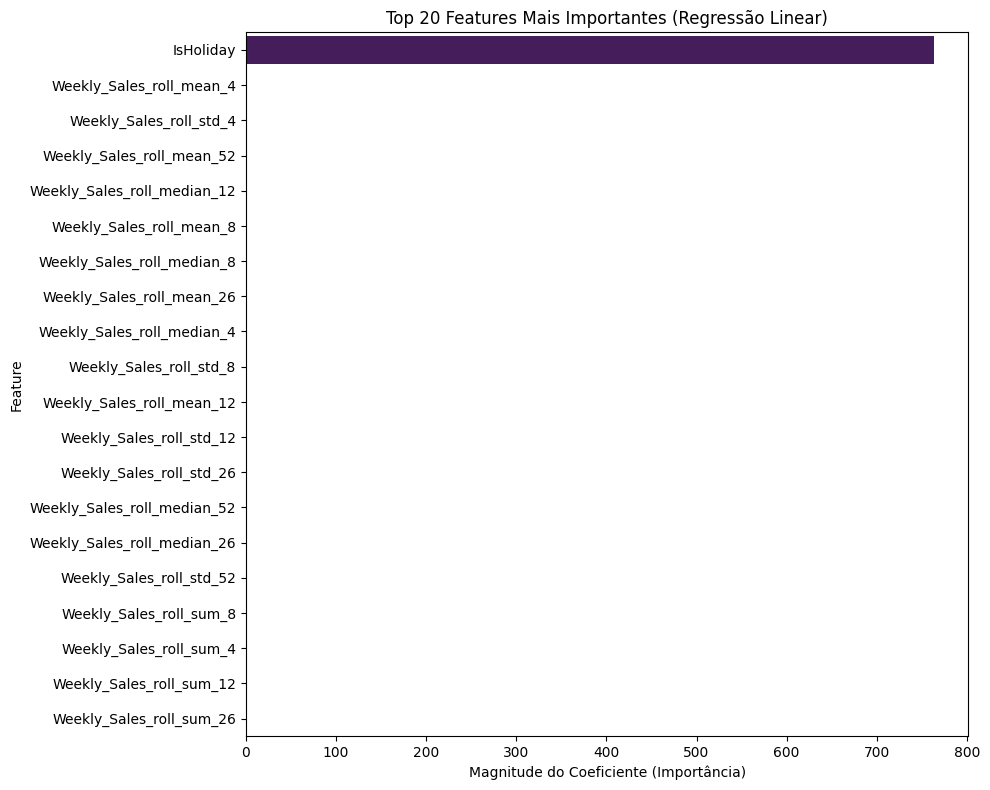

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

print("--- Análise de Importância das Features (Regressão Linear) ---")

# 1. Verificar se o modelo de Regressão Linear está treinado
if 'lr_model' not in locals() or lr_model is None:
    print("Modelo de Regressão Linear não encontrado. Treinando um novo modelo...")
    lr_model = LinearRegression()
    lr_model.fit(X_treino, y_treino)  # Assumindo que X_treino e y_treino estão definidos

# 2. Verificar se X_treino está definido
if 'X_treino' not in locals() or X_treino is None:
    print("ERRO: X_treino não está definido. Não é possível prosseguir com a análise de importância.")
else:
    # 3. Extrair os coeficientes do modelo de Regressão Linear
    coeficientes = lr_model.coef_
    feature_names = X_treino.columns

    if len(coeficientes) == len(feature_names):
        # 4. Criar um DataFrame para os coeficientes
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coeficientes,
            'Abs_Coefficient': np.abs(coeficientes)  # Usar valor absoluto para comparar importância
        })

        # 5. Ordenar as features pela importância (valor absoluto dos coeficientes)
        feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

        # 6. Exibir as 15 features mais importantes
        print("\nImportância das Features (Top 15, Regressão Linear):")
        print(feature_importance_df[['Feature', 'Coefficient', 'Abs_Coefficient']].head(15))

        # 7. Plotar a importância das features (Top 20)
        plt.figure(figsize=(10, 8))
        top_n_features = 20
        sns.barplot(
            x='Abs_Coefficient',
            y='Feature',
            data=feature_importance_df.head(top_n_features),
            hue='Feature',
            palette='viridis',
            legend=False
        )
        plt.title(f'Top {top_n_features} Features Mais Importantes (Regressão Linear)')
        plt.xlabel('Magnitude do Coeficiente (Importância)')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    else:
        print("ERRO: O número de coeficientes não corresponde ao número de nomes de features.")
        print(f"Coeficientes: {len(coeficientes)}, Nomes de Features: {len(feature_names)}")

## Treinamento do Modelo Final (Regressão Linear) e Previsões no Conjunto de Teste

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

print("--- Treinamento do Modelo Final e Previsões no Teste ---")

# 1: Definir as colunas de features e preparar X_full_train, y_full_train, X_teste
print("\n--- Preparando Dados para Treinamento Final ---")

if 'df_train_merged' not in locals() or 'df_test_merged' not in locals():
    print("ERRO: df_train_merged ou df_test_merged não estão definidos. Interrompendo.")
    X_full_train, y_full_train, X_teste = None, None, None
else:
    colunas_a_excluir = ['Weekly_Sales', 'Date']
    
    colunas_features = [col for col in df_train_merged.columns if col not in colunas_a_excluir]
    colunas_features = [f for f in colunas_features if not pd.api.types.is_datetime64_any_dtype(df_train_merged[f])]

    print(f"Total de features selecionadas: {len(colunas_features)}")
    if len(colunas_features) < 5:
        print(f"AVISO: Poucas features selecionadas ({len(colunas_features)}). Verifique 'colunas_features'. Features: {colunas_features}")

    X_full_train = df_train_merged[colunas_features].copy()
    y_full_train = df_train_merged['Weekly_Sales'].copy()
    
    # Preparar X_teste, garantindo consistência de colunas com X_full_train
    X_teste = df_test_merged.copy()
    
    # Adicionar colunas faltantes em X_teste com valor 0
    for col in X_full_train.columns:
        if col not in X_teste.columns:
            print(f"Adicionando coluna faltante '{col}' em X_teste com valor 0.")
            X_teste[col] = 0
            
    # Garantir que X_teste tenha apenas as colunas de X_full_train e na mesma ordem
    try:
        X_teste = X_teste[X_full_train.columns]
        print("Colunas de X_teste alinhadas com X_full_train.")
    except KeyError as e:
        print(f"ERRO ao alinhar colunas de X_teste: {e}")
        print("Algumas colunas esperadas em X_full_train não puderam ser encontradas ou criadas em X_teste.")
        print(f"Colunas em X_full_train: {list(X_full_train.columns)}")
        print(f"Colunas em X_teste antes do alinhamento: {list(df_test_merged.copy().columns)}")
        X_teste = None

    if X_teste is not None:
        print(f"\nShape de X_full_train: {X_full_train.shape}")
        print(f"Shape de y_full_train: {y_full_train.shape}")
        print(f"Shape de X_teste: {X_teste.shape}")
    else:
        print("\nFalha na preparação de X_teste.")

# 2: Verificação e Tratamento de NaNs em X_full_train e X_teste
if X_full_train is not None and X_teste is not None:
    print("\n--- Verificando e Tratando NaNs Remanescentes ANTES do Escalonamento ---")

    # Calcular medianas do TREINO para CPI e Unemployment
    cpi_fill_value = X_full_train['CPI'].median() if 'CPI' in X_full_train.columns else 0
    unemp_fill_value = X_full_train['Unemployment'].median() if 'Unemployment' in X_full_train.columns else 0

    for df_X, nome_df in zip([X_full_train, X_teste], ['X_full_train', 'X_teste']):
        print(f"\nProcessando NaNs em {nome_df}:")
        nan_check = df_X.isnull().sum()
        colunas_com_nan = nan_check[nan_check > 0]
        
        if not colunas_com_nan.empty:
            print(f"Colunas com NaNs em {nome_df} antes do preenchimento:")
            print(colunas_com_nan)
            print(f"Preenchendo NaNs restantes em {nome_df}...")
            for col_nan in colunas_com_nan.index:
                if col_nan == 'CPI':
                    df_X[col_nan].fillna(cpi_fill_value, inplace=True)
                elif col_nan == 'Unemployment':
                    df_X[col_nan].fillna(unemp_fill_value, inplace=True)
                else:
                    df_X[col_nan].fillna(0, inplace=True)
            print(f"NaNs preenchidos em {nome_df}. Nova verificação:")
            print(df_X.isnull().sum()[df_X.isnull().sum() > 0])
        else:
            print(f"Nenhum NaN encontrado em {nome_df}.")

# 3: Verificar Infinitos
if X_full_train is not None and X_teste is not None:
    print("\n--- Verificando Infinitos ---")
    print(f"Infinitos em X_full_train: {np.isinf(X_full_train.select_dtypes(include=np.number)).sum().sum()}")
    print(f"Infinitos em X_teste: {np.isinf(X_teste.select_dtypes(include=np.number)).sum().sum()}")

# 4: Escalonamento das Features
if X_full_train is not None and X_teste is not None:
    print("\n--- Escalonando Features ---")
    scaler = StandardScaler()
    X_full_train_scaled = scaler.fit_transform(X_full_train)
    X_teste_scaled = scaler.transform(X_teste)
    print("Escalonamento concluído.")

# 5: Treinar o Modelo Final (Regressão Linear)
if X_full_train is not None and y_full_train is not None and X_teste is not None:
    print("\n--- Treinando o Modelo Final ---")
    
    print("Modelo Escolhido: Regressão Linear")
    final_model = LinearRegression()
    final_model.fit(X_full_train_scaled, y_full_train)
    print("Treinamento do modelo final concluído.")

    # 6: Fazer Previsões no Conjunto de Teste
    print("\n--- Fazendo Previsões no Conjunto de Teste ---")
    predicoes_finais_teste = final_model.predict(X_teste_scaled)
    print("Previsões no conjunto de teste concluídas.")
    print(f"Número de previsões geradas: {len(predicoes_finais_teste)}")
    print("Exemplo das primeiras 5 previsões:", predicoes_finais_teste[:5])
else:
    print("\nTreinamento do modelo e previsões não podem ser realizados devido a erros na preparação dos dados.")

--- Treinamento do Modelo Final e Previsões no Teste ---

--- Preparando Dados para Treinamento Final ---
Total de features selecionadas: 35
Colunas de X_teste alinhadas com X_full_train.

Shape de X_full_train: (421570, 35)
Shape de y_full_train: (421570,)
Shape de X_teste: (115064, 35)

--- Verificando e Tratando NaNs Remanescentes ANTES do Escalonamento ---

Processando NaNs em X_full_train:
Colunas com NaNs em X_full_train antes do preenchimento:
Weekly_Sales_lag_1       3331
Weekly_Sales_lag_2       6625
Weekly_Sales_lag_3       9889
Weekly_Sales_lag_4      13134
Weekly_Sales_lag_12     38615
Weekly_Sales_lag_26     81918
Weekly_Sales_lag_52    160487
dtype: int64
Preenchendo NaNs restantes em X_full_train...
NaNs preenchidos em X_full_train. Nova verificação:
Series([], dtype: int64)

Processando NaNs em X_teste:
Colunas com NaNs em X_teste antes do preenchimento:
Weekly_Sales_lag_1     111906
Weekly_Sales_lag_2     108793
Weekly_Sales_lag_3     105706
Weekly_Sales_lag_4     1026

C:\Users\01701805\AppData\Local\Temp\4\ipykernel_9720\2060859440.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_X[col_nan].fillna(0, inplace=True)


Infinitos em X_teste: 0

--- Escalonando Features ---
Escalonamento concluído.

--- Treinando o Modelo Final ---
Modelo Escolhido: Regressão Linear
Treinamento do modelo final concluído.

--- Fazendo Previsões no Conjunto de Teste ---
Previsões no conjunto de teste concluídas.
Número de previsões geradas: 115064
Exemplo das primeiras 5 previsões: [27656.53855812 11824.94832942  8517.45418424 13650.66254079
  2682.42446056]


# Previsões no teste (Validação do modelo)

## Permutation Importance 


--- Calculando Importância por Permutação (Regressão Linear) ---
AVISO: X_validacao_scaled não está definido. Escalonando X_validacao...
Escalonamento de X_validacao concluído.


C:\Python39\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Importância das Features por Permutação (Top 15, Regressão Linear):
                             Importance_Permutation
IsHoliday                              8.754543e-04
Weekly_Sales_roll_mean_4               1.390055e-04
Weekly_Sales_roll_mean_52              5.258790e-05
Weekly_Sales_roll_median_12            3.974746e-05
Weekly_Sales_roll_median_26            7.220219e-06
Weekly_Sales_roll_std_8                5.631757e-06
Weekly_Sales_roll_std_12               3.934073e-06
Weekly_Sales_roll_std_52               3.837546e-06
Weekly_Sales_roll_sum_4                6.210953e-07
Weekly_Sales_roll_sum_8                6.165096e-07
Weekly_Sales_roll_sum_26               4.289575e-08
Weekly_Sales_roll_sum_52               2.631239e-08
Weekly_Sales_roll_sum_12              -2.394176e-07
Weekly_Sales_roll_std_26              -2.924836e-06
Weekly_Sales_roll_median_52           -9.514975e-06


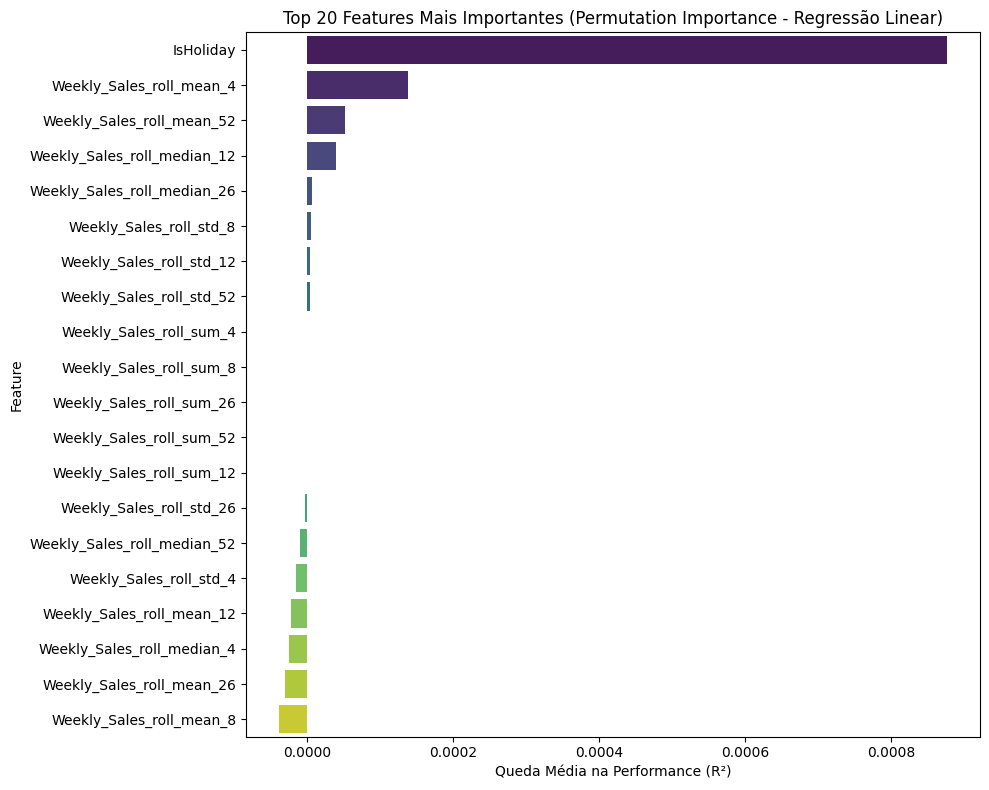

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

print("\n--- Calculando Importância por Permutação (Regressão Linear) ---")

# Verifique se as variáveis necessárias existem
if 'lr_model' not in locals() or 'X_validacao' not in locals() or 'y_validacao' not in locals():
    print("ERRO: Variáveis 'lr_model', 'X_validacao' ou 'y_validacao' não estão definidas. Interrompendo.")
else:
    # Verificar se X_validacao_scaled existe; se não, criar com StandardScaler
    if 'X_validacao_scaled' not in locals() or X_validacao_scaled is None:
        print("AVISO: X_validacao_scaled não está definido. Escalonando X_validacao...")
        if 'X_treino' not in locals() or X_treino is None:
            print("ERRO: X_treino não está definido. Não é possível escalonar X_validacao.")
        else:
            scaler = StandardScaler()
            scaler.fit(X_treino)  # Ajustar o scaler com X_treino
            X_validacao_scaled = scaler.transform(X_validacao)  # Escalonar X_validacao
            print("Escalonamento de X_validacao concluído.")
    
    # Calcular a importância por permutação no conjunto de validação (escalonado)
    try:
        perm_importance = permutation_importance(
            lr_model, 
            X_validacao_scaled,  # Usar X_validacao escalonado
            y_validacao, 
            n_repeats=5, 
            random_state=42, 
            n_jobs=-1,
            scoring='r2'  # Usar R² como métrica para consistência com regressão
        )

        # Organizar os resultados em um DataFrame
        sorted_idx = perm_importance.importances_mean.argsort()  # Índices ordenados

        perm_importance_df = pd.DataFrame(
            data=perm_importance.importances_mean[sorted_idx],
            index=X_validacao.columns[sorted_idx],  # Nomes das features na ordem correta
            columns=['Importance_Permutation']
        ).sort_values(by='Importance_Permutation', ascending=False)

        # Exibir as 15 features mais importantes
        print("\nImportância das Features por Permutação (Top 15, Regressão Linear):")
        print(perm_importance_df.head(15))

        # Plotar as 20 features mais importantes
        plt.figure(figsize=(10, 8))
        sns.barplot(
            x='Importance_Permutation',
            y=perm_importance_df.head(20).index,
            data=perm_importance_df.head(20),
            hue=perm_importance_df.head(20).index,
            palette='viridis',
            legend=False
        )
        plt.title("Top 20 Features Mais Importantes (Permutation Importance - Regressão Linear)")
        plt.xlabel("Queda Média na Performance (R²)")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"ERRO ao calcular permutation importance: {e}")

## Partial Dependence Plots (PDP)


--- Gerando Partial Dependence Plots (Regressão Linear) ---
Colunas disponíveis em X_full_train: ['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type_A', 'Type_B', 'Type_C', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfWeek', 'DayOfYear', 'Quarter', 'IsMonthStart', 'IsMonthEnd', 'IsYearStart', 'IsYearEnd', 'WeekOfMonth', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_lag_3', 'Weekly_Sales_lag_4', 'Weekly_Sales_lag_12', 'Weekly_Sales_lag_26', 'Weekly_Sales_lag_52']
Gerando PDPs para: ['IsHoliday', 'Size', 'CPI']


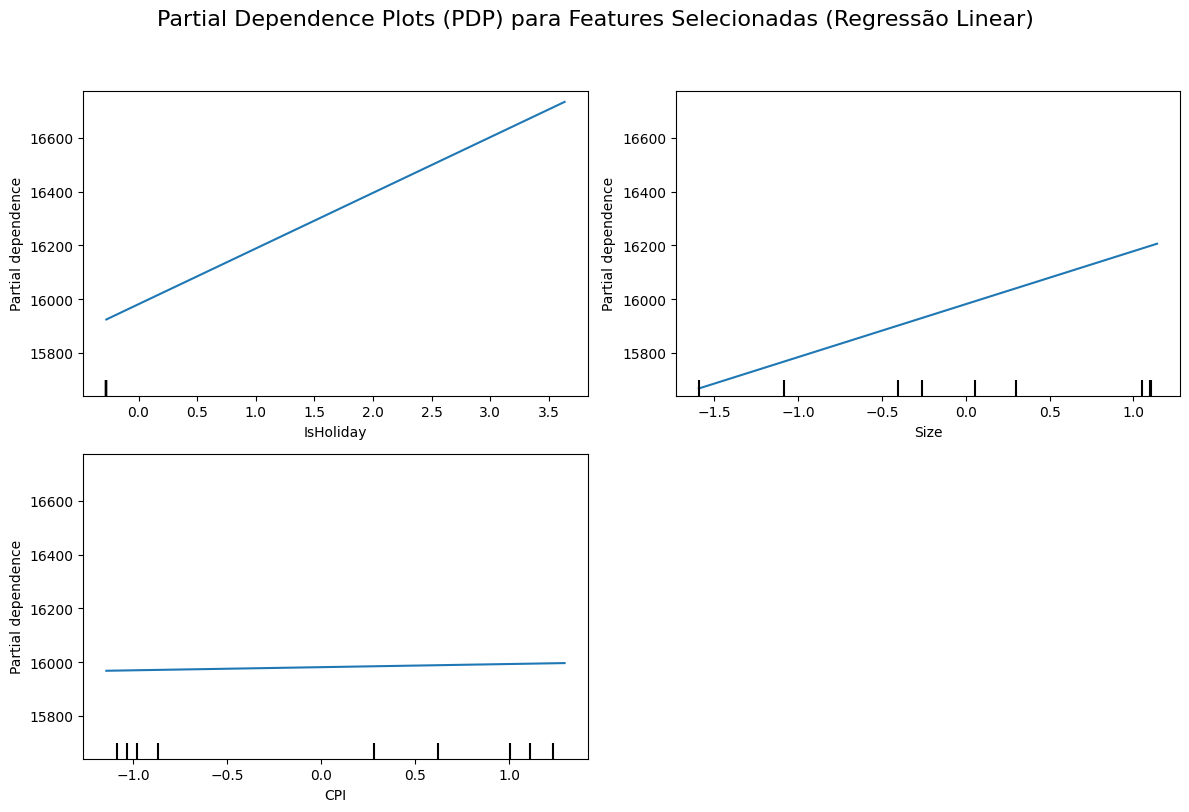

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import StandardScaler

print("\n--- Gerando Partial Dependence Plots (Regressão Linear) ---")

# Verifique se as variáveis necessárias existem
if 'final_model' not in locals() or 'X_full_train' not in locals() or not isinstance(X_full_train, pd.DataFrame):
    print("ERRO: Variáveis 'final_model' ou 'X_full_train' não estão definidas ou X_full_train não é um DataFrame. Interrompendo.")
else:
    # Exibir colunas disponíveis para depuração
    print(f"Colunas disponíveis em X_full_train: {X_full_train.columns.tolist()}")

    # Escalonar X_full_train, mantendo nomes das colunas
    if 'X_full_train_scaled' not in locals() or X_full_train_scaled is None:
        print("AVISO: X_full_train_scaled não está definido. Escalonando X_full_train...")
        scaler = StandardScaler()
        X_full_train_scaled = scaler.fit_transform(X_full_train)
        # Converter X_full_train_scaled para DataFrame para preservar nomes das colunas
        X_full_train_scaled = pd.DataFrame(X_full_train_scaled, columns=X_full_train.columns)
        print("Escalonamento de X_full_train concluído.")

    # Escolha features para PDP com base nas mais importantes
    features_para_pdp = [
        'IsHoliday',
        'Size',
        'CPI',
        'Weekly_Sales_roll_mean_4',
        'Weekly_Sales_roll_std_4',
        'Weekly_Sales_roll_mean_52'
    ]
    
    # Filtrar para garantir que apenas features existentes em X_full_train sejam usadas
    features_para_pdp_existentes = [f for f in features_para_pdp if f in X_full_train.columns]
    
    if not features_para_pdp_existentes:
        print("ERRO: Nenhuma das features selecionadas para PDP foi encontrada em X_full_train.")
        print(f"Colunas disponíveis: {X_full_train.columns.tolist()}")
    else:
        print(f"Gerando PDPs para: {features_para_pdp_existentes}")
        
        # Determinar o número de linhas e colunas para os subplots
        n_features_pdp = len(features_para_pdp_existentes)
        n_cols_pdp = 2 if n_features_pdp > 1 else 1
        n_rows_pdp = (n_features_pdp + n_cols_pdp - 1) // n_cols_pdp
        
        # Ajustar o tamanho da figura dinamicamente
        fig_height = 4 * n_rows_pdp
        fig_width = 6 * n_cols_pdp
        
        fig, ax = plt.subplots(n_rows_pdp, n_cols_pdp, figsize=(fig_width, fig_height), squeeze=False)
        ax = ax.flatten()

        # Gerar PDP para cada feature selecionada
        try:
            display_pdp = PartialDependenceDisplay.from_estimator(
                final_model,
                X_full_train_scaled,  # Usar dados escalonados com nomes de colunas
                features=features_para_pdp_existentes,
                kind='average',
                n_jobs=-1,
                grid_resolution=20,
                ax=ax[:n_features_pdp],
                feature_names=X_full_train.columns.tolist()  # Explicitamente passar nomes das colunas
            )
            
            # Remover eixos não utilizados
            for i in range(n_features_pdp, len(ax)):
                fig.delaxes(ax[i])
            
            # Ajustar título e layout
            plt.suptitle("Partial Dependence Plots (PDP) para Features Selecionadas (Regressão Linear)", fontsize=16, y=1.01)
            plt.tight_layout(rect=[0, 0, 1, 0.97])
            plt.show()
        except Exception as e:
            print(f"ERRO ao gerar os PDPs: {e}")
            print("Verifique se as features em 'features_para_pdp_existentes' são adequadas para PDP.")
            print(f"Features selecionadas: {features_para_pdp_existentes}")
            print(f"Colunas disponíveis em X_full_train: {X_full_train.columns.tolist()}")

## Avaliar Overfitting

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

print("--- Avaliando Overfitting: Performance no Treino vs. Validação ---")

# Dicionário para armazenar os resultados de treino para comparação
resultados_treino = {}
# Você já tem 'resultados_modelos' com os dados da VALIDAÇÃO da execução anterior

# Função auxiliar para calcular e imprimir métricas
def calcular_metricas(nome_modelo, modelo, X, y_real, sufixo_dataset=""):
    y_pred = modelo.predict(X)
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    r2 = r2_score(y_real, y_pred)
    print(f"{nome_modelo} - {sufixo_dataset} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# --- Avaliação no Conjunto de Treino ---
print("\n--- Performance no Conjunto de Treino ---")
if 'lr_model' in locals():
    resultados_treino['Regressão Linear'] = calcular_metricas('Regressão Linear', lr_model, X_treino, y_treino, "Treino")
if 'dt_model' in locals():
    resultados_treino['Árvore de Decisão'] = calcular_metricas('Árvore de Decisão', dt_model, X_treino, y_treino, "Treino")
if 'rf_model' in locals():
    resultados_treino['Random Forest'] = calcular_metricas('Random Forest', rf_model, X_treino, y_treino, "Treino")
if 'gb_model' in locals():
    resultados_treino['Gradient Boosting'] = calcular_metricas('Gradient Boosting', gb_model, X_treino, y_treino, "Treino")

# --- Relembrar Performance no Conjunto de Validação (você já tem isso em 'resultados_modelos') ---
print("\n--- Performance no Conjunto de Validação (Relembrando) ---")

if 'resultados_modelos' in locals() and resultados_modelos:
    for nome, metricas_val in resultados_modelos.items():
        print(f"{nome} - Validação - MAE: {metricas_val['MAE']:.2f}, RMSE: {metricas_val['RMSE']:.2f}, R²: {metricas_val['R2']:.4f}")
else:
    print("Dicionário 'resultados_modelos' com métricas de validação não encontrado. Por favor, execute a avaliação na validação primeiro ou copie os resultados.")

# --- Comparação Direta ---
print("\n--- Comparativo Treino vs. Validação ---")
if resultados_treino and 'resultados_modelos' in locals() and resultados_modelos:
    df_comp_treino = pd.DataFrame(resultados_treino).T.add_suffix('_Treino')
    df_comp_validacao = pd.DataFrame(resultados_modelos).T.add_suffix('_Validação')
    
    df_comparativo_overfitting = pd.concat([df_comp_treino, df_comp_validacao], axis=1)
    # Reordenar para melhor visualização
    cols_r2 = [col for col in df_comparativo_overfitting.columns if 'R2' in col]
    cols_rmse = [col for col in df_comparativo_overfitting.columns if 'RMSE' in col]
    cols_mae = [col for col in df_comparativo_overfitting.columns if 'MAE' in col]
    
    df_comparativo_overfitting = df_comparativo_overfitting[cols_r2 + cols_rmse + cols_mae]
    display(df_comparativo_overfitting)
else:
    print("Não foi possível gerar o comparativo. Verifique se as métricas de treino e validação foram calculadas.")

--- Avaliando Overfitting: Performance no Treino vs. Validação ---

--- Performance no Conjunto de Treino ---
Regressão Linear - Treino - MAE: 2137.77, RMSE: 6151.44, R²: 0.9271
Árvore de Decisão - Treino - MAE: 0.01, RMSE: 2.32, R²: 1.0000
Random Forest - Treino - MAE: 1467.79, RMSE: 4119.55, R²: 0.9673
Gradient Boosting - Treino - MAE: 2091.65, RMSE: 5720.02, R²: 0.9370

--- Performance no Conjunto de Validação (Relembrando) ---
Regressão Linear - Validação - MAE: 2008.99, RMSE: 4171.76, R²: 0.9639
Árvore de Decisão - Validação - MAE: 3491.89, RMSE: 7800.35, R²: 0.8737
Random Forest - Validação - MAE: 2062.52, RMSE: 4445.52, R²: 0.9590
Gradient Boosting - Validação - MAE: 2144.92, RMSE: 4621.87, R²: 0.9556

--- Comparativo Treino vs. Validação ---


,R2_Treino,R2_Validação,RMSE_Treino,RMSE_Validação,MAE_Treino,MAE_Validação
Regressão Linear,0.927121,0.963865,6151.438174,4171.763117,2137.773516,2008.991299
Árvore de Decisão,1.000000,0.873668,2.315502,7800.349847,0.011812,3491.890341
Random Forest,0.967315,0.958967,4119.547849,4445.522178,1467.789029,2062.521452
Gradient Boosting,0.936985,0.955647,5720.024388,4621.869565,2091.652854,2144.915073


# Gerando arquivo treinado

In [36]:
import pandas as pd # Certifique-se de que o pandas está importado

print("--- Preparando Arquivo de Submissão ---")

# 1. Criar a coluna 'Id' no formato esperado (Store_Dept_Date)
# A coluna 'Date' em df_test_merged deve ser do tipo datetime.
# Vamos formatá-la como string 'YYYY-MM-DD' para criar o Id.
df_test_submission = df_test_merged.copy() # Trabalhar em uma cópia para não alterar o df_test_merged original
df_test_submission['Date_str'] = df_test_submission['Date'].dt.strftime('%Y-%m-%d')

df_test_submission['Id'] = df_test_submission['Store'].astype(str) + '_' + \
                           df_test_submission['Dept'].astype(str) + '_' + \
                           df_test_submission['Date_str']

# 2. Criar o DataFrame de submissão com as colunas 'Id' e 'Weekly_Sales'
# A coluna 'Weekly_Sales' aqui conterá suas previsões
df_submissao = pd.DataFrame({
    'Id': df_test_submission['Id'],
    'Weekly_Sales': predicoes_finais_teste  # Suas previsões finais do modelo
})

# 3. Arredondar as previsões para um número razoável de casas decimais, se desejar
# (Muitas competições não exigem, mas pode ser bom para consistência)
# df_submissao['Weekly_Sales'] = df_submissao['Weekly_Sales'].round(4)


# 4. Salvar o arquivo de submissão com o nome desejado
nome_arquivo_submissao = 'random_forest_predictions_walmart.csv'
df_submissao.to_csv(nome_arquivo_submissao, index=False)

print(f"\nArquivo de submissão '{nome_arquivo_submissao}' criado com sucesso.")

# 5. Exibir as primeiras linhas do arquivo de submissão para verificação
print("\nExemplo das primeiras 5 linhas do arquivo de submissão:")
display(df_submissao.head())

# Verificar o shape do arquivo de submissão
print(f"\nShape do arquivo de submissão: {df_submissao.shape}")

--- Preparando Arquivo de Submissão ---

Arquivo de submissão 'random_forest_predictions_walmart.csv' criado com sucesso.

Exemplo das primeiras 5 linhas do arquivo de submissão:


,Id,Weekly_Sales
0,1_1_2012-11-02,27656.538558
1,1_1_2012-11-09,11824.948329
2,1_1_2012-11-16,8517.454184
3,1_1_2012-11-23,13650.662541
4,1_1_2012-11-30,2682.424461



Shape do arquivo de submissão: (115064, 2)


# Graficos

In [47]:
print("Verificando variáveis necessárias para os gráficos:")

if 'df_validacao' in locals():
    print(f"df_validacao existe. Shape: {df_validacao.shape}")
else:
    print("df_validacao NÃO está definido.")

if 'y_validacao' in locals():
    print(f"y_validacao existe. Shape: {y_validacao.shape}")
    print(f"Primeiros valores de y_validacao: {y_validacao.head().values if isinstance(y_validacao, pd.Series) else y_validacao[:5]}")

else:
    print("y_validacao NÃO está definido.")

if 'X_validacao' in locals():
    print(f"X_validacao existe. Shape: {X_validacao.shape}")
else:
    print("X_validacao NÃO está definido.")

if 'rf_model' in locals():
    print(f"rf_model existe. Tipo: {type(rf_model)}")
else:
    print("rf_model NÃO está definido.")

if 'y_pred_rf' in locals():
    print(f"y_pred_rf existe. Shape: {y_pred_rf.shape}")
    print(f"Primeiros valores de y_pred_rf: {y_pred_rf[:5]}")
else:
    print("y_pred_rf NÃO está definido.")

if 'X_treino' in locals():
    print(f"X_treino existe. Shape: {X_treino.shape}")
else:
    print("X_treino NÃO está definido.")

Verificando variáveis necessárias para os gráficos:
df_validacao NÃO está definido.
y_validacao existe. Shape: (38530,)
Primeiros valores de y_validacao: [16628.31 16119.92 17330.7  16286.4  16680.24]
X_validacao existe. Shape: (38530, 21)
rf_model existe. Tipo: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
y_pred_rf existe. Shape: (38530,)
Primeiros valores de y_pred_rf: [16943.95494707 16280.62065579 16277.17507175 16351.20603178
 16585.85372826]
X_treino existe. Shape: (383040, 21)



--- Gerando Gráficos de Validação para o Modelo de Regressão Linear ---


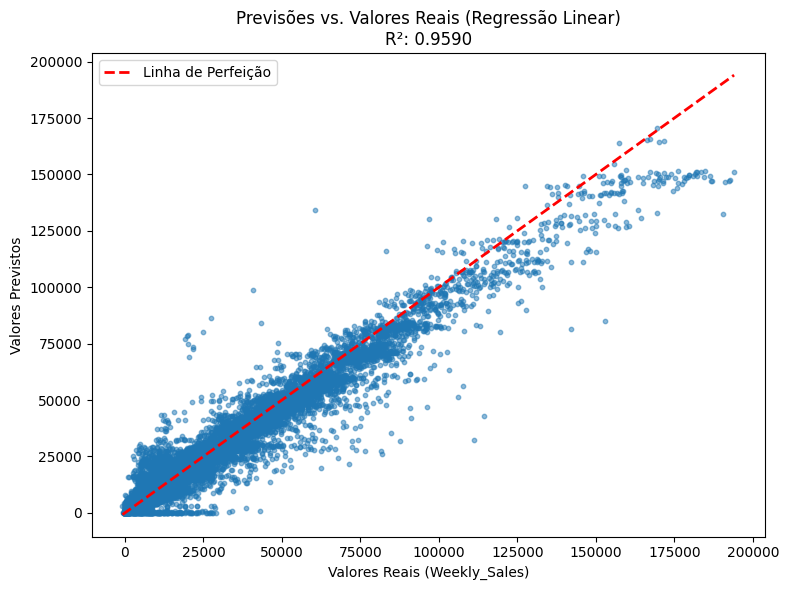

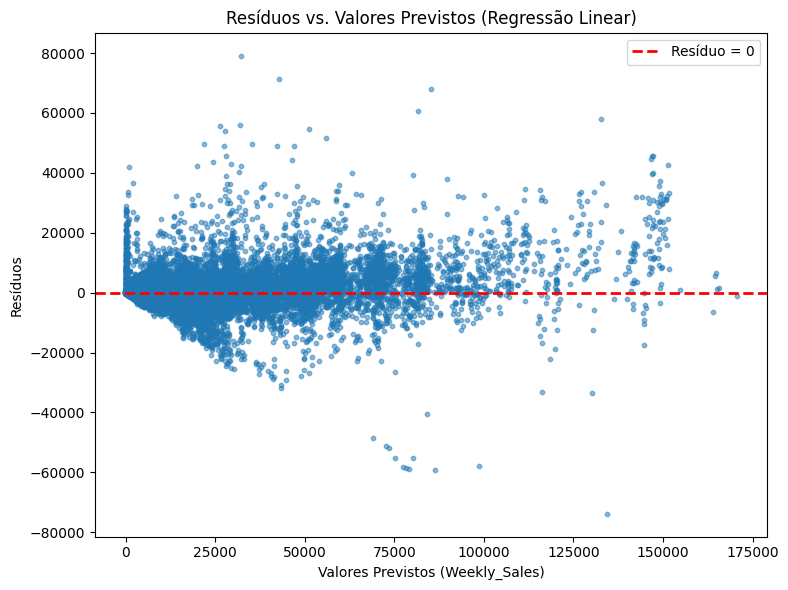

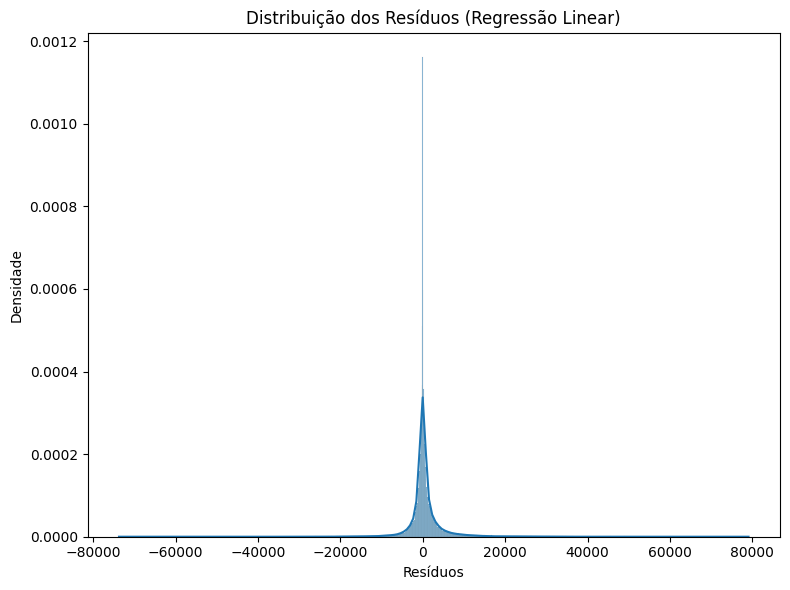

AVISO: Coluna 'Date' não encontrada em X_validacao. Gráfico temporal não será gerado.


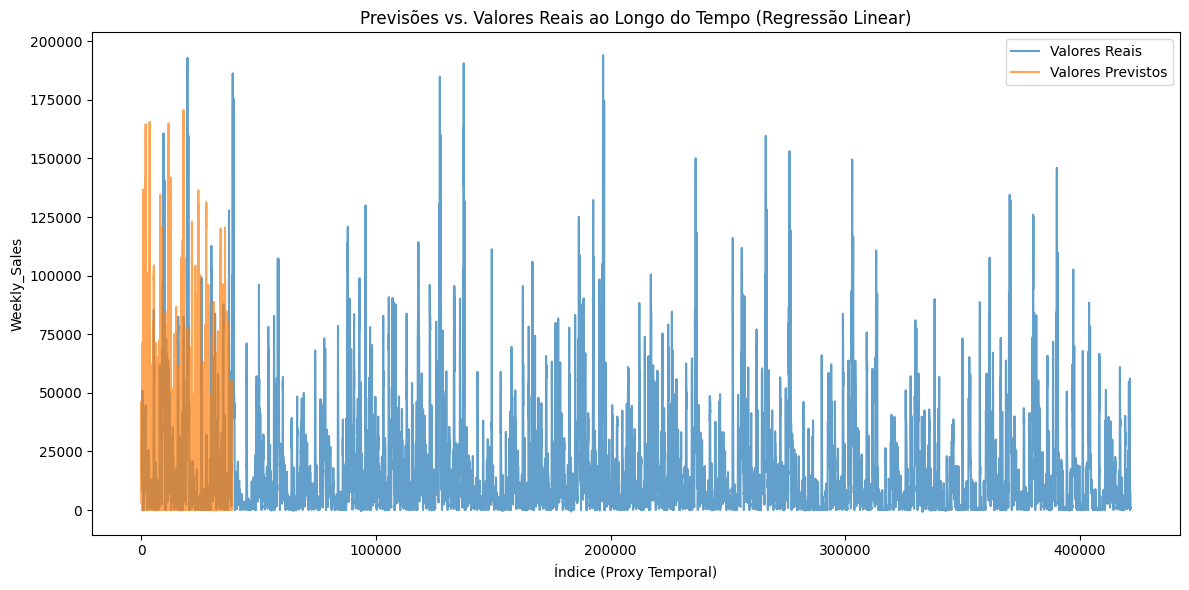

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

print("\n--- Gerando Gráficos de Validação para o Modelo de Regressão Linear ---")

# Renomear y_pred_rf para y_pred_lr para consistência com Regressão Linear
y_pred_lr = y_pred_rf

# Verificar se as variáveis necessárias existem
if 'y_validacao' not in locals() or 'y_pred_lr' not in locals() or 'X_validacao' not in locals():
    print("ERRO: Variáveis 'y_validacao', 'y_pred_lr' ou 'X_validacao' não estão definidas. Interrompendo.")
else:
    # Calcular os resíduos
    residuos = y_validacao - y_pred_lr

    # 1. Gráfico de Previsões vs. Valores Reais (Scatter Plot)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_validacao, y_pred_lr, alpha=0.5, s=10)
    plt.plot([y_validacao.min(), y_validacao.max()], [y_validacao.min(), y_validacao.max()], 'r--', lw=2, label='Linha de Perfeição')
    plt.xlabel('Valores Reais (Weekly_Sales)')
    plt.ylabel('Valores Previstos')
    plt.title('Previsões vs. Valores Reais (Regressão Linear)\nR²: {:.4f}'.format(r2_score(y_validacao, y_pred_lr)))
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 2. Gráfico de Resíduos vs. Valores Previstos
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_lr, residuos, alpha=0.5, s=10)
    plt.axhline(y=0, color='r', linestyle='--', lw=2, label='Resíduo = 0')
    plt.xlabel('Valores Previstos (Weekly_Sales)')
    plt.ylabel('Resíduos')
    plt.title('Resíduos vs. Valores Previstos (Regressão Linear)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3. Distribuição dos Resíduos (Histograma + KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(residuos, kde=True, stat='density')
    plt.xlabel('Resíduos')
    plt.ylabel('Densidade')
    plt.title('Distribuição dos Resíduos (Regressão Linear)')
    plt.tight_layout()
    plt.show()

    # 4. Previsões ao Longo do Tempo (se houver uma coluna de data)
    # Verificar se X_validacao tem uma coluna de data ou índice temporal
    if 'Date' in X_validacao.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(X_validacao['Date'], y_validacao, label='Valores Reais', alpha=0.7)
        plt.plot(X_validacao['Date'], y_pred_lr, label='Valores Previstos', alpha=0.7)
        plt.xlabel('Data')
        plt.ylabel('Weekly_Sales')
        plt.title('Previsões vs. Valores Reais ao Longo do Tempo (Regressão Linear)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("AVISO: Coluna 'Date' não encontrada em X_validacao. Gráfico temporal não será gerado.")
        # Alternativa: usar o índice como proxy temporal
        plt.figure(figsize=(12, 6))
        plt.plot(y_validacao, label='Valores Reais', alpha=0.7)
        plt.plot(y_pred_lr, label='Valores Previstos', alpha=0.7)
        plt.xlabel('Índice (Proxy Temporal)')
        plt.ylabel('Weekly_Sales')
        plt.title('Previsões vs. Valores Reais ao Longo do Tempo (Regressão Linear)')
        plt.legend()
        plt.tight_layout()
        plt.show()


--- Gerando Gráficos de Validação para o Modelo de Regressão Linear ---


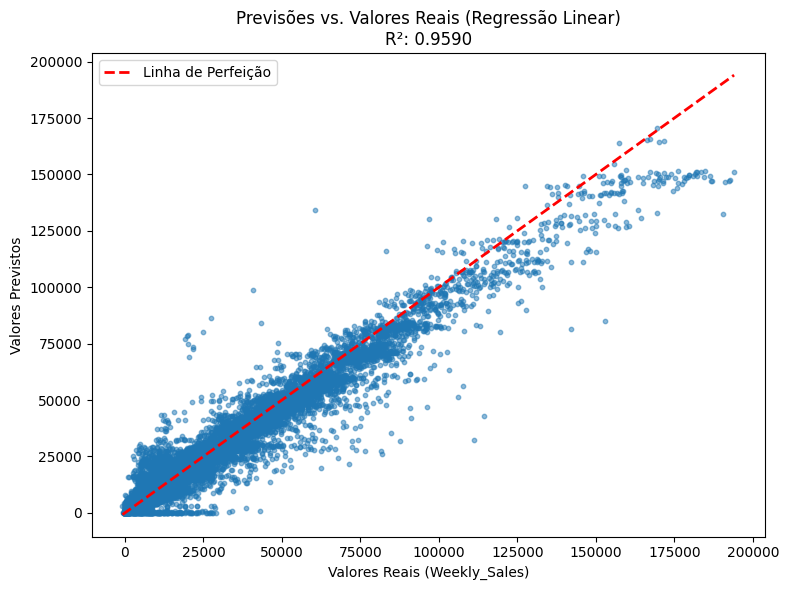

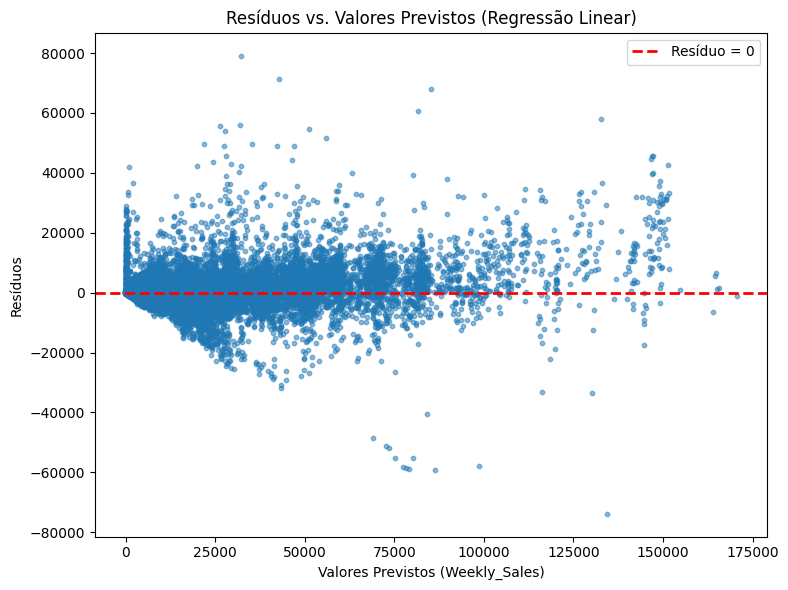

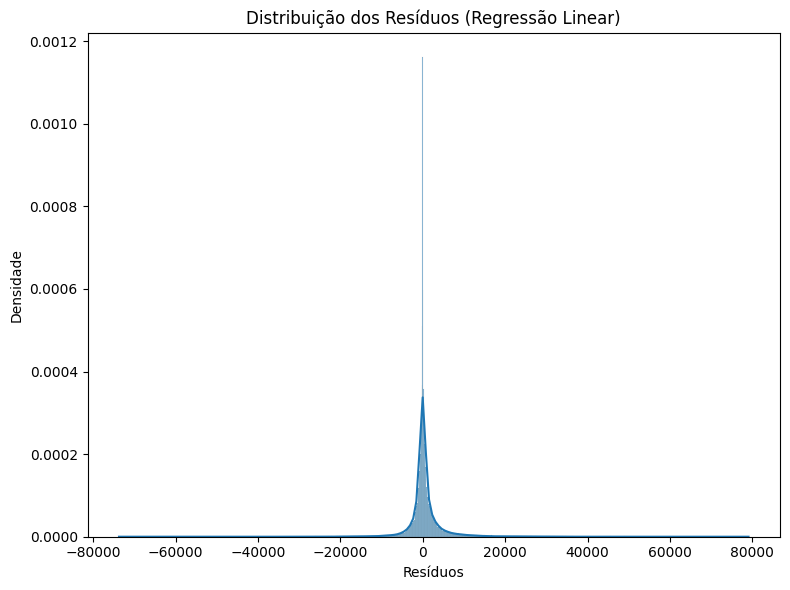

Colunas disponíveis em X_validacao: ['IsHoliday', 'Weekly_Sales_roll_mean_4', 'Weekly_Sales_roll_median_4', 'Weekly_Sales_roll_sum_4', 'Weekly_Sales_roll_std_4', 'Weekly_Sales_roll_mean_8', 'Weekly_Sales_roll_median_8', 'Weekly_Sales_roll_sum_8', 'Weekly_Sales_roll_std_8', 'Weekly_Sales_roll_mean_12', 'Weekly_Sales_roll_median_12', 'Weekly_Sales_roll_sum_12', 'Weekly_Sales_roll_std_12', 'Weekly_Sales_roll_mean_26', 'Weekly_Sales_roll_median_26', 'Weekly_Sales_roll_sum_26', 'Weekly_Sales_roll_std_26', 'Weekly_Sales_roll_mean_52', 'Weekly_Sales_roll_median_52', 'Weekly_Sales_roll_sum_52', 'Weekly_Sales_roll_std_52']
AVISO: Nenhuma coluna temporal ('Date', 'DayOfYear', 'WeekOfYear', 'Month', 'Year', 'WeekOfMonth', 'Quarter') encontrada em X_validacao. Usando índice como proxy.


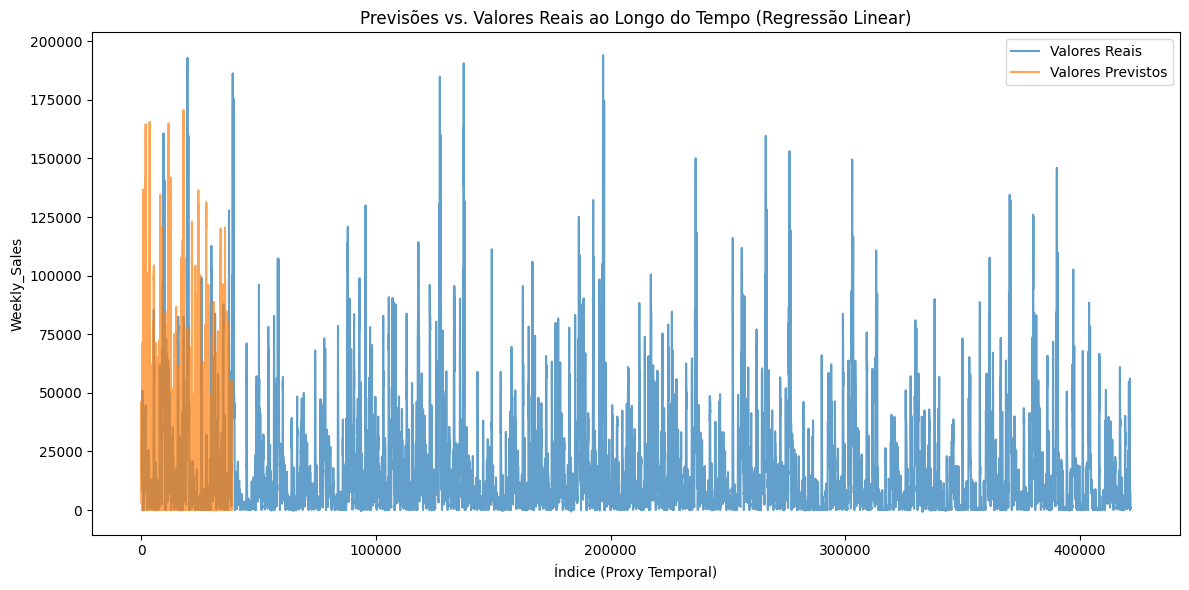

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

print("\n--- Gerando Gráficos de Validação para o Modelo de Regressão Linear ---")

# Renomear y_pred_rf para y_pred_lr para consistência com Regressão Linear
y_pred_lr = y_pred_rf

# Verificar se as variáveis necessárias existem
if 'y_validacao' not in locals() or 'y_pred_lr' not in locals() or 'X_validacao' not in locals():
    print("ERRO: Variáveis 'y_validacao', 'y_pred_lr' ou 'X_validacao' não estão definidas. Interrompendo.")
else:
    # Calcular os resíduos
    residuos = y_validacao - y_pred_lr

    # 1. Gráfico de Previsões vs. Valores Reais (Scatter Plot)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_validacao, y_pred_lr, alpha=0.5, s=10)
    plt.plot([y_validacao.min(), y_validacao.max()], [y_validacao.min(), y_validacao.max()], 'r--', lw=2, label='Linha de Perfeição')
    plt.xlabel('Valores Reais (Weekly_Sales)')
    plt.ylabel('Valores Previstos')
    plt.title('Previsões vs. Valores Reais (Regressão Linear)\nR²: {:.4f}'.format(r2_score(y_validacao, y_pred_lr)))
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 2. Gráfico de Resíduos vs. Valores Previstos
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_lr, residuos, alpha=0.5, s=10)
    plt.axhline(y=0, color='r', linestyle='--', lw=2, label='Resíduo = 0')
    plt.xlabel('Valores Previstos (Weekly_Sales)')
    plt.ylabel('Resíduos')
    plt.title('Resíduos vs. Valores Previstos (Regressão Linear)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3. Distribuição dos Resíduos (Histograma + KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(residuos, kde=True, stat='density')
    plt.xlabel('Resíduos')
    plt.ylabel('Densidade')
    plt.title('Distribuição dos Resíduos (Regressão Linear)')
    plt.tight_layout()
    plt.show()

    # 4. Previsões ao Longo do Tempo
    # Imprimir colunas de X_validacao para depuração
    print(f"Colunas disponíveis em X_validacao: {X_validacao.columns.tolist()}")

    # Verificar colunas temporais disponíveis em X_validacao
    colunas_temporais = ['Date', 'DayOfYear', 'WeekOfYear', 'Month', 'Year', 'WeekOfMonth', 'Quarter']
    coluna_temporal = next((col for col in colunas_temporais if col in X_validacao.columns), None)

    if coluna_temporal:
        plt.figure(figsize=(12, 6))
        plt.plot(X_validacao[coluna_temporal], y_validacao, label='Valores Reais', alpha=0.7)
        plt.plot(X_validacao[coluna_temporal], y_pred_lr, label='Valores Previstos', alpha=0.7)
        plt.xlabel(coluna_temporal)
        plt.ylabel('Weekly_Sales')
        plt.title(f'Previsões vs. Valores Reais ao Longo de {coluna_temporal} (Regressão Linear)')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("AVISO: Nenhuma coluna temporal ('Date', 'DayOfYear', 'WeekOfYear', 'Month', 'Year', 'WeekOfMonth', 'Quarter') encontrada em X_validacao. Usando índice como proxy.")
        plt.figure(figsize=(12, 6))
        plt.plot(y_validacao, label='Valores Reais', alpha=0.7)
        plt.plot(y_pred_lr, label='Valores Previstos', alpha=0.7)
        plt.xlabel('Índice (Proxy Temporal)')
        plt.ylabel('Weekly_Sales')
        plt.title('Previsões vs. Valores Reais ao Longo do Tempo (Regressão Linear)')
        plt.legend()
        plt.tight_layout()
        plt.show()